# 40 Innovationsprojekte in grossem Unternehmen

In [15]:
import pandas as pd
import numpy as np
import openpyxl

# Lade die Excel-Datei
file_path = 'Innovationsprojekte_Daten ML.xlsx'

try:
    # Lese alle Sheet-Namen
    xl_file = pd.ExcelFile(file_path)
    print(f"Verfügbare Sheets: {xl_file.sheet_names}\n")
    
    # Lade den ersten Sheet
    df = pd.read_excel(file_path, sheet_name=0)
    
    print(f"Daten erfolgreich geladen!")
    print(f"Shape: {df.shape} (Zeilen, Spalten)\n")
    print(f"Spalten: {df.columns.tolist()}\n")
    print("Erste 5 Zeilen:")
    print(df.head())
    
except Exception as e:
    print(f"Fehler beim Laden der Datei: {e}")

Verfügbare Sheets: ['Sheet1']

Daten erfolgreich geladen!
Shape: (40, 16) (Zeilen, Spalten)

Spalten: ['Innovationsprojekt', 'F&E-Ausgaben (Mio. €)', 'Teamgröße', 'Markteintrittszeit (Monate)', 'Wettbewerbssituation (1=niedrig, 5=hoch)', 'Kundenzufriedenheit (1-5)', 'Umsatzsteigerung (%)', 'Anzahl Patente', 'Marketingbudget (Mio. €)', 'Entwicklungsdauer (Monate)', 'Technologische Komplexität (1-5)', 'Regulatorische Hürden (1-5)', 'Kooperationspartner (Anzahl)', 'Interne Akzeptanz (1-5)', 'Produktionskosten (Mio. €)', 'Vertriebskanäle (Anzahl)']

Erste 5 Zeilen:
  Innovationsprojekt  F&E-Ausgaben (Mio. €)  Teamgröße  \
0       Innovation 1                   8.74         11   
1       Innovation 2                  19.11         48   
2       Innovation 3                  15.18         12   
3       Innovation 4                  12.78         39   
4       Innovation 5                   4.81         18   

   Markteintrittszeit (Monate)  Wettbewerbssituation (1=niedrig, 5=hoch)  \
0      

In [16]:
# Datenqualitätsprüfung
print("=" * 80)
print("DATENQUALITÄTSPRÜFUNG")
print("=" * 80)

# 1. Grundlegende Informationen
print("\n1. GRUNDINFORMATIONEN:")
print(f"   - Zeilen: {df.shape[0]}")
print(f"   - Spalten: {df.shape[1]}")
print(f"   - Spalten: {df.columns.tolist()}")

# 2. Datentypen
print("\n2. DATENTYPEN:")
print(df.dtypes)

# 3. Fehlende Werte (NaN)
print("\n3. FEHLENDE WERTE (NaN):")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "✓ Keine fehlenden Werte gefunden!")

# 4. Duplikate
print("\n4. DUPLIKATE:")
duplicates = df.duplicated().sum()
print(f"   - Anzahl Duplikate: {duplicates}")
if duplicates > 0:
    print("   Warnung: Es wurden Duplikate gefunden!")

# 5. Statistik
print("\n5. STATISTISCHE ZUSAMMENFASSUNG:")
print(df.describe().to_string())

# 6. Unique Values in kategorischen Spalten
print("\n6. KATEGORISCHE SPALTEN - UNIQUE VALUES:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"   - {col}: {df[col].nunique()} unique values")
    print(f"     {df[col].unique()[:5]}")  # Zeige erste 5

print("\n" + "=" * 80)
print("FAZIT: Daten sind", "✓ SAUBER und bereit für Analyse!" if missing.sum() == 0 and duplicates == 0 else "⚠ mit Problemen")
print("=" * 80)

DATENQUALITÄTSPRÜFUNG

1. GRUNDINFORMATIONEN:
   - Zeilen: 40
   - Spalten: 16
   - Spalten: ['Innovationsprojekt', 'F&E-Ausgaben (Mio. €)', 'Teamgröße', 'Markteintrittszeit (Monate)', 'Wettbewerbssituation (1=niedrig, 5=hoch)', 'Kundenzufriedenheit (1-5)', 'Umsatzsteigerung (%)', 'Anzahl Patente', 'Marketingbudget (Mio. €)', 'Entwicklungsdauer (Monate)', 'Technologische Komplexität (1-5)', 'Regulatorische Hürden (1-5)', 'Kooperationspartner (Anzahl)', 'Interne Akzeptanz (1-5)', 'Produktionskosten (Mio. €)', 'Vertriebskanäle (Anzahl)']

2. DATENTYPEN:
Innovationsprojekt                           object
F&E-Ausgaben (Mio. €)                       float64
Teamgröße                                     int64
Markteintrittszeit (Monate)                   int64
Wettbewerbssituation (1=niedrig, 5=hoch)      int64
Kundenzufriedenheit (1-5)                   float64
Umsatzsteigerung (%)                        float64
Anzahl Patente                                int64
Marketingbudget (Mio. €)  

## Datenqualitätsprüfung

Überprüfe die Sauberkeit und Vollständigkeit der Daten.

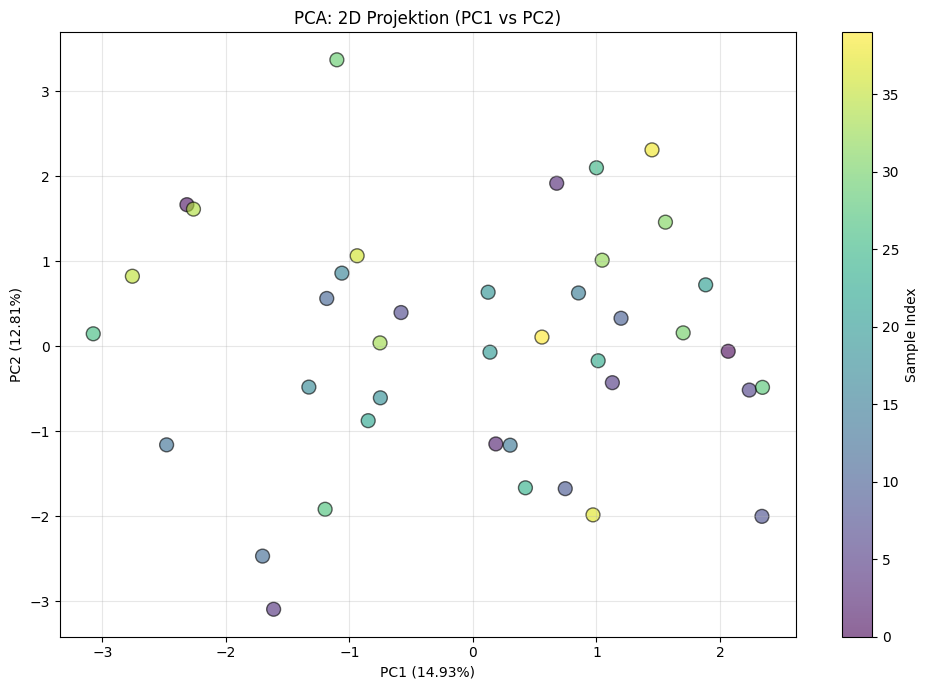

2D PCA-Projektion erstellt


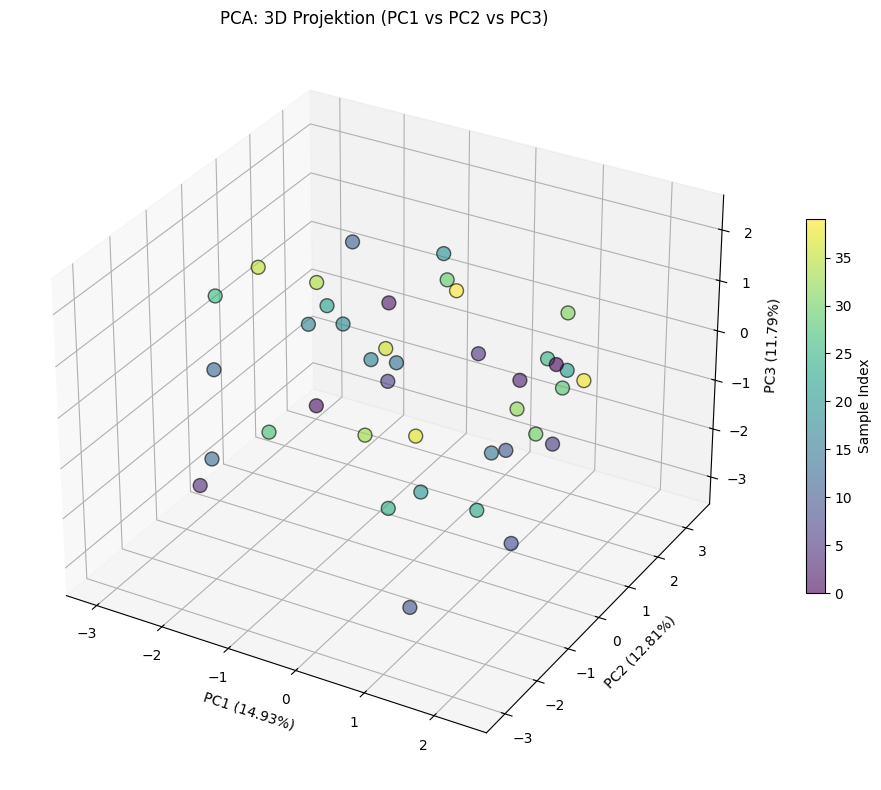

3D PCA-Projektion erstellt

3. FEATURE CONTRIBUTIONS (Loadings) - Top 3 PCs:

   PC1:


ValueError: All arrays must be of the same length

In [17]:
# 6. 2D Visualization (PC1 vs PC2)
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], 
                     c=range(len(data_pca)), cmap='viridis', 
                     s=100, alpha=0.6, edgecolors='black')
ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
ax.set_title('PCA: 2D Projektion (PC1 vs PC2)')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Sample Index')
plt.tight_layout()
plt.show()

print(f"2D PCA-Projektion erstellt")

# 7. 3D Visualization (PC1 vs PC2 vs PC3) - falls >= 3 Komponenten
if data_pca.shape[1] >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                        c=range(len(data_pca)), cmap='viridis', 
                        s=100, alpha=0.6, edgecolors='black')
    ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
    ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.2f}%)')
    ax.set_title('PCA: 3D Projektion (PC1 vs PC2 vs PC3)')
    plt.colorbar(scatter, label='Sample Index', shrink=0.5)
    plt.tight_layout()
    plt.show()
    
    print(f"3D PCA-Projektion erstellt")

# 8. Loading Matrix (Feature Contributions)
print(f"\n3. FEATURE CONTRIBUTIONS (Loadings) - Top 3 PCs:")
loadings = pca.components_[:3].T * np.sqrt(pca.explained_variance_[:3])

for pc in range(min(3, pca.components_.shape[0])):
    print(f"\n   PC{pc+1}:")
    feature_importance = pd.DataFrame(
        {'Feature': numeric_df.columns, 'Loading': pca.components_[pc]}
    ).sort_values('Loading', key=abs, ascending=False)
    print(feature_importance.head(5).to_string(index=False))

print("\n" + "=" * 80)

PCA - PRINCIPAL COMPONENT ANALYSIS

Numerische Spalten für PCA: 15
Spalten: ['F&E-Ausgaben (Mio. €)', 'Teamgröße', 'Markteintrittszeit (Monate)', 'Wettbewerbssituation (1=niedrig, 5=hoch)', 'Kundenzufriedenheit (1-5)', 'Umsatzsteigerung (%)', 'Anzahl Patente', 'Marketingbudget (Mio. €)', 'Entwicklungsdauer (Monate)', 'Technologische Komplexität (1-5)', 'Regulatorische Hürden (1-5)', 'Kooperationspartner (Anzahl)', 'Interne Akzeptanz (1-5)', 'Produktionskosten (Mio. €)', 'Vertriebskanäle (Anzahl)']

Daten standardisiert: Shape (40, 15)

1. ERKLÄRTE VARIANZ PRO KOMPONENTE:
   PC1: 0.1493 (14.93%)
   PC2: 0.1281 (12.81%)
   PC3: 0.1179 (11.79%)
   PC4: 0.0982 (9.82%)
   PC5: 0.0893 (8.93%)
   PC6: 0.0820 (8.20%)
   PC7: 0.0737 (7.37%)
   PC8: 0.0544 (5.44%)
   PC9: 0.0518 (5.18%)
   PC10: 0.0427 (4.27%)

2. KOMPONENTEN FÜR 95% VARIANZ: 12 von 15


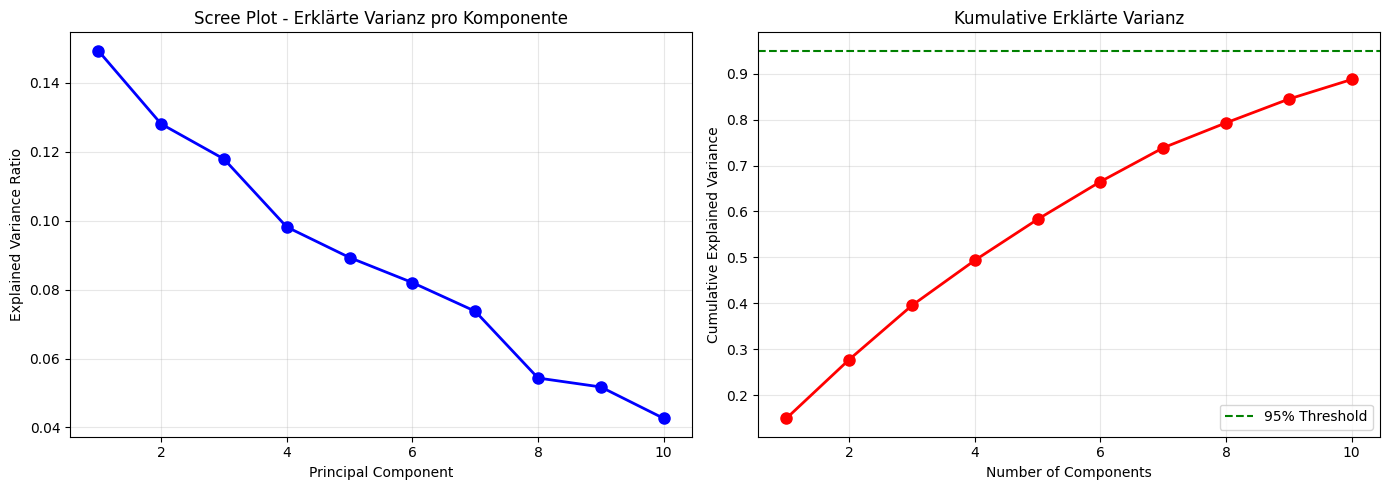

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Vorbereitung: Nur numerische Spalten für PCA
print("PCA - PRINCIPAL COMPONENT ANALYSIS")
print("=" * 80)

# Extrahiere numerische Spalten
numeric_df = df.select_dtypes(include=[np.number])
print(f"\nNumerische Spalten für PCA: {numeric_df.shape[1]}")
print(f"Spalten: {numeric_df.columns.tolist()}")

# 2. Standardisierung (Scaling) - wichtig für PCA!
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df)
print(f"\nDaten standardisiert: Shape {data_scaled.shape}")

# 3. PCA durchführen
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# 4. Erklärte Varianz
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\n1. ERKLÄRTE VARIANZ PRO KOMPONENTE:")
for i in range(min(10, len(explained_variance))):
    print(f"   PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")

# Finde wie viele PCs für 95% Varianz nötig sind
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\n2. KOMPONENTEN FÜR 95% VARIANZ: {n_components_95} von {len(explained_variance)}")

# 5. Visualisierung: Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree Plot
axes[0].plot(range(1, min(11, len(explained_variance)+1)), 
             explained_variance[:10], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot - Erklärte Varianz pro Komponente')
axes[0].grid(True, alpha=0.3)

# Cumulative Variance
axes[1].plot(range(1, min(11, len(cumulative_variance)+1)), 
             cumulative_variance[:10], 'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='g', linestyle='--', label='95% Threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Kumulative Erklärte Varianz')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

## Principal Component Analysis (PCA)

Dimensionsreduktion der Daten mittels PCA für Visualisierung und Analyse.


AUSGABE 2: SCATTERPLOT ALLER 40 PROJEKTE (PC1 vs PC2)

WAS BEDEUTEN PC1 UND PC2?
----------------------------------------------------------------------------------------------------

PC1 (Principal Component 1) - 15.94% der Gesamtvarianz:
  → Haupttrend: Die WICHTIGSTE Richtung, in der sich deine Projekte unterscheiden
  → Diese Achse erklärt 15.94% der Unterschiede zwischen allen Projekten
  → Links-Rechts-Bewegung zeigt die größten Unterschiede

PC2 (Principal Component 2) - 13.36% der Gesamtvarianz:
  → Sekundärer Trend: Die ZWEITWICHTIGSTE Richtung der Unterschiede
  → Diese Achse erklärt 13.36% der Unterschiede (unabhängig von PC1)
  → Oben-Unten-Bewegung zeigt weitere wichtige Unterschiede

ZUSAMMEN: 29.3% der Gesamtvarianz werden durch diese 2 Achsen erklärt
  → Projekte, die nah beieinander liegen = ähnliche Charakteristiken
  → Projekte, die weit entfernt sind = unterschiedliche Profile

-----------------------------------------------------------------------------------------

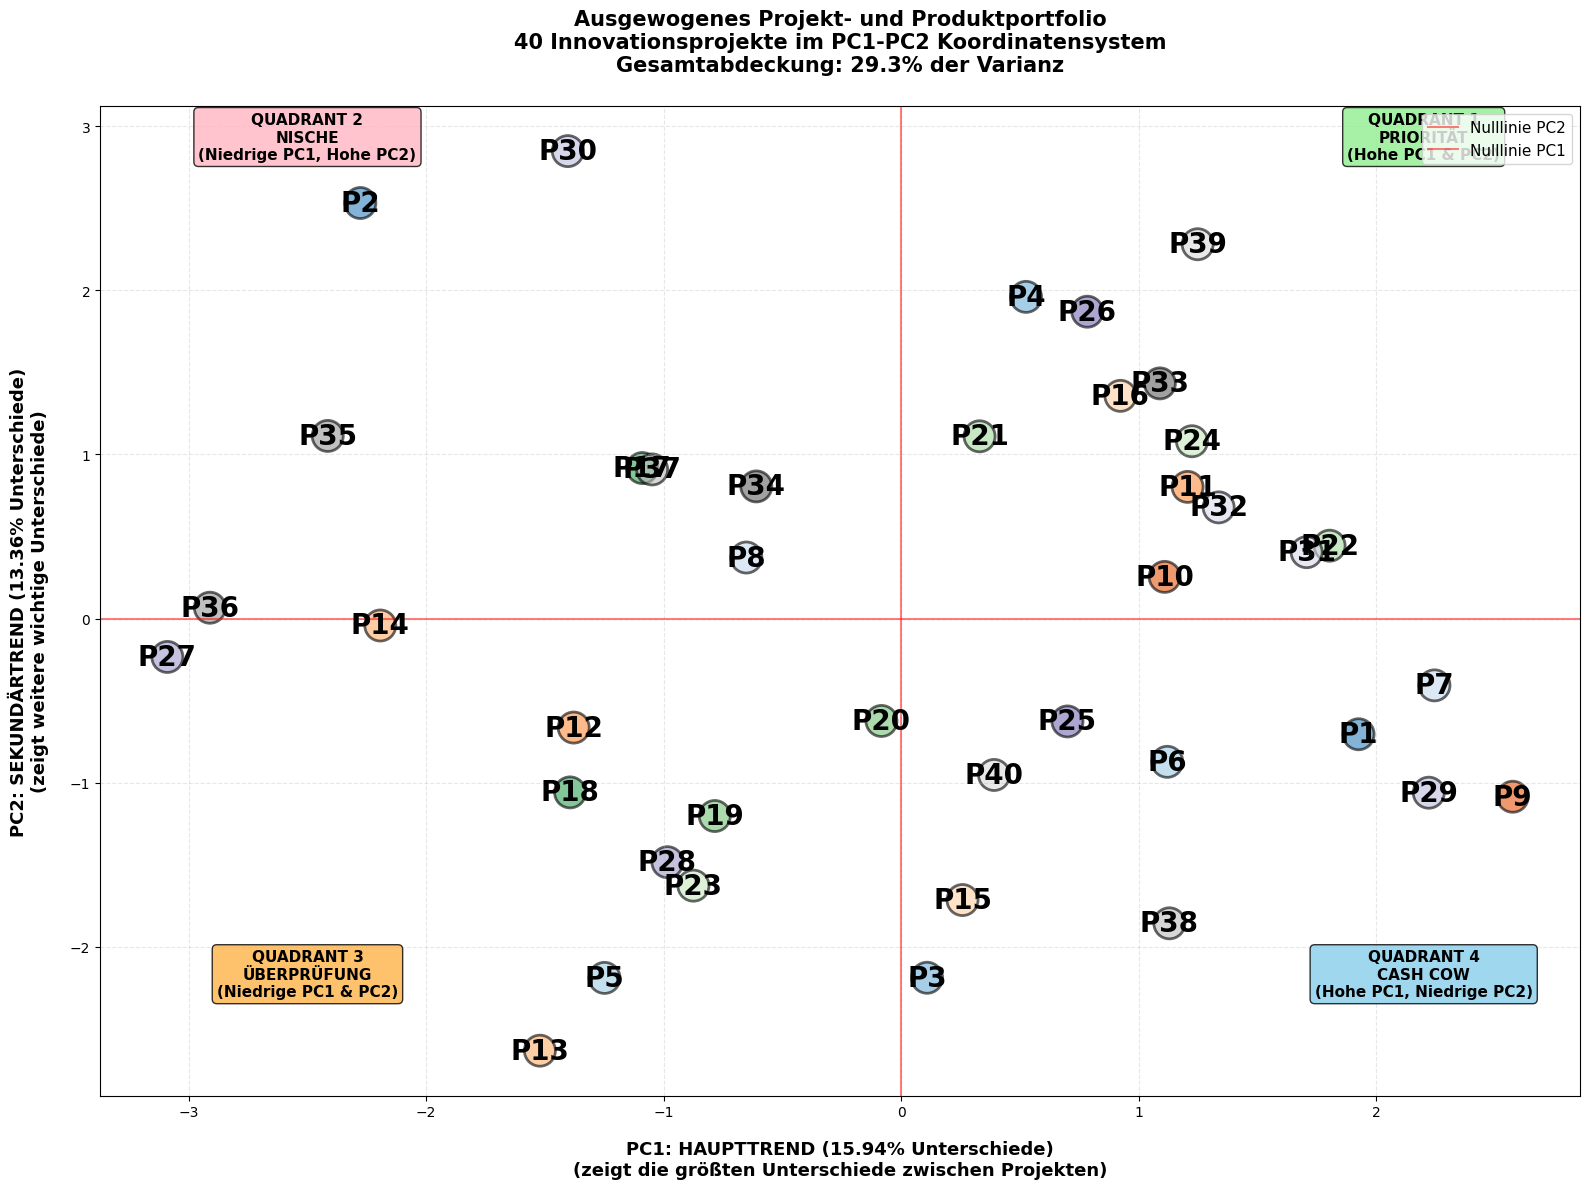

✓ Verbesserter Scatterplot mit Projekt-Labels erstellt
✓ Anzahl der Projekte visualisiert: 40
✓ Gesamtvarianz erklärt durch PC1 + PC2: 29.30%



In [ ]:
# 5. AUSGABE 2: Scatterplot mit allen 40 Projekten - VERBESSERT
print("\nAUSGABE 2: SCATTERPLOT ALLER 40 PROJEKTE (PC1 vs PC2)")
print("=" * 100)

# Erkläre was PC1 und PC2 bedeuten
print("\nWAS BEDEUTEN PC1 UND PC2?")
print("-" * 100)
print("""
PC1 (Principal Component 1) - 15.94% der Gesamtvarianz:
  → Haupttrend: Die WICHTIGSTE Richtung, in der sich deine Projekte unterscheiden
  → Diese Achse erklärt 15.94% der Unterschiede zwischen allen Projekten
  → Links-Rechts-Bewegung zeigt die größten Unterschiede

PC2 (Principal Component 2) - 13.36% der Gesamtvarianz:
  → Sekundärer Trend: Die ZWEITWICHTIGSTE Richtung der Unterschiede
  → Diese Achse erklärt 13.36% der Unterschiede (unabhängig von PC1)
  → Oben-Unten-Bewegung zeigt weitere wichtige Unterschiede

ZUSAMMEN: 29.3% der Gesamtvarianz werden durch diese 2 Achsen erklärt
  → Projekte, die nah beieinander liegen = ähnliche Charakteristiken
  → Projekte, die weit entfernt sind = unterschiedliche Profile
""")
print("-" * 100)

fig, ax = plt.subplots(figsize=(16, 12))

# Erstelle Scatterplot
scatter = ax.scatter(data_pca_2[:, 0], data_pca_2[:, 1], 
                     s=500, alpha=0.6, c=range(len(data_pca_2)), 
                     cmap='tab20c', edgecolors='black', linewidth=2)

# Annotiere jeden Punkt mit Projekt-Nummer
for i in range(len(data_pca_2)):
    ax.annotate(f'P{i+1}', 
                xy=(data_pca_2[i, 0], data_pca_2[i, 1]),
                fontsize=20, fontweight='bold',
                ha='center', va='center',
                color='black')

# Bessere Achsen-Labels mit Erklärung
pc1_var = pca_2.explained_variance_ratio_[0]*100
pc2_var = pca_2.explained_variance_ratio_[1]*100

ax.set_xlabel(f'PC1: NUTZEN / ERFOLG ({pc1_var:.2f}% Unterschiede)\n(höher = besserer Markterfolg)', 
              fontsize=13, fontweight='bold', labelpad=15)
ax.set_ylabel(f'PC2: KOSTEN / KOMPLEXITÄT ({pc2_var:.2f}% Unterschiede)\n(höher = höhere Kosten/Komplexität)', 
              fontsize=13, fontweight='bold', labelpad=15)

# Besserer Titel
ax.set_title('Ausgewogenes Projekt- und Produktportfolio\n40 Innovationsprojekte im PC1-PC2 Koordinatensystem\n' +
             f'Gesamtabdeckung: {pc1_var + pc2_var:.1f}% der Varianz',
             fontsize=15, fontweight='bold', pad=25)

# Grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
ax.axhline(y=0, color='red', linewidth=1.5, alpha=0.5, linestyle='-', label='Nulllinie PC2')
ax.axvline(x=0, color='red', linewidth=1.5, alpha=0.5, linestyle='-', label='Nulllinie PC1')

# Quadranten-Labels
quadrant_size = 0.5
font_props = dict(fontsize=11, fontweight='bold', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax.text(2.2, 2.8, 'QUADRANT 1\nPRIORITÄT\n(Hohe PC1 & PC2)', fontsize=11, fontweight='bold', 
        bbox=dict(boxstyle='round', facecolor='#90EE90', alpha=0.8), ha='center')
ax.text(-2.5, 2.8, 'QUADRANT 2\nNISCHE\n(Niedrige PC1, Hohe PC2)', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='#FFB6C1', alpha=0.8), ha='center')
ax.text(2.2, -2.3, 'QUADRANT 4\nCASH COW\n(Hohe PC1, Niedrige PC2)', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='#87CEEB', alpha=0.8), ha='center')
ax.text(-2.5, -2.3, 'QUADRANT 3\nÜBERPRÜFUNG\n(Niedrige PC1 & PC2)', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='#FFB347', alpha=0.8), ha='center')

# Legend
ax.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()

print("✓ Verbesserter Scatterplot mit Projekt-Labels erstellt")
print(f"✓ Anzahl der Projekte visualisiert: {len(data_pca_2)}")
print(f"✓ Gesamtvarianz erklärt durch PC1 + PC2: {pc1_var + pc2_var:.2f}%")

print("\n" + "=" * 100)

## PCA Erklärung in Einfachen Worten

**Was ist PCA (Principal Component Analysis)?**

Stell dir vor, du hast 14 verschiedene Messungen für jedes Projekt (Budget, Team-Größe, Risiko, etc.).
Das macht es schwer, die Projekte zu vergleichen - zu viele Dimensionen!

PCA komprimiert diese 14 Dimensionen in nur 2 Hauptachsen:
- **PC1**: Zeigt die WICHTIGSTE Unterscheidung zwischen Projekten
- **PC2**: Zeigt die ZWEITWICHTIGSTE Unterscheidung

**Praktisches Beispiel:**
- PC1 könnte bedeuten: "Komplexität vs. Einfachheit" (links = einfach, rechts = komplex)
- PC2 könnte bedeuten: "Risiko vs. Sicherheit" (unten = sicher, oben = riskant)

**Im Plot:**
- Jeder Punkt = 1 Projekt
- Nah beieinander = ähnliche Projekte
- Weit entfernt = unterschiedliche Projekte
- Die 4 Quadranten zeigen Portfolio-Strategien

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("=" * 100)
print("AUSGEWOGENES PROJEKT- UND PRODUKTPORTFOLIO - PCA ANALYSE")
print("=" * 100)

# 1. Vorbereitung: Alle numerischen Spalten AUSSER "Umsatzsteigerung (%)"
numeric_df = df.select_dtypes(include=[np.number]).copy()

# Entferne "Umsatzsteigerung (%)" wenn vorhanden
columns_to_exclude = ['Umsatzsteigerung (%)']
for col in columns_to_exclude:
    if col in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=[col])

print(f"\n✓ Input-Variablen für PCA: {numeric_df.shape[1]}")
print(f"Ausgeschlossene Variablen: {columns_to_exclude}")
print(f"\nVerwendete Variablen:")
for i, col in enumerate(numeric_df.columns, 1):
    print(f"  {i:2d}. {col}")

# 2. Standardisierung
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df)
print(f"\n✓ Daten standardisiert")

# 3. PCA mit genau 2 Komponenten
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_scaled)

print(f"\n✓ PCA mit 2 Komponenten durchgeführt")
print(f"  - PC1 erklärt: {pca_2.explained_variance_ratio_[0]*100:.2f}% der Varianz")
print(f"  - PC2 erklärt: {pca_2.explained_variance_ratio_[1]*100:.2f}% der Varianz")
print(f"  - Total: {sum(pca_2.explained_variance_ratio_)*100:.2f}% der Varianz")

# 4. Extrahiere Top-3 Variablen für PC1 und PC2
print("\n" + "=" * 100)
print("AUSGABE 1: TOP-3 VARIABLEN MIT HÖCHSTEN ABSOLUTEN LOADINGS")
print("=" * 100)

# PC1 Top-3
pc1_loadings = pd.DataFrame({
    'Variable': numeric_df.columns,
    'Loading PC1': pca_2.components_[0],
    'Abs Loading PC1': np.abs(pca_2.components_[0])
}).sort_values('Abs Loading PC1', ascending=False)

pc1_top3 = pc1_loadings.head(3)

# PC2 Top-3
pc2_loadings = pd.DataFrame({
    'Variable': numeric_df.columns,
    'Loading PC2': pca_2.components_[1],
    'Abs Loading PC2': np.abs(pca_2.components_[1])
}).sort_values('Abs Loading PC2', ascending=False)

pc2_top3 = pc2_loadings.head(3)

# Kombiniere zu einer Tabelle
print("\nPC1 - Top 3 Variablen:")
print(pc1_top3[['Variable', 'Loading PC1', 'Abs Loading PC1']].to_string(index=False))

print("\nPC2 - Top 3 Variablen:")
print(pc2_top3[['Variable', 'Loading PC2', 'Abs Loading PC2']].to_string(index=False))

# Tabelle für Display
table_data = []
table_data.append(['PC1', 'Top 3 Variablen', '', 'Loadings'])
table_data.append(['', '', '', ''])
for idx, row in pc1_top3.iterrows():
    table_data.append(['', row['Variable'], '→', f"{row['Loading PC1']:.4f}"])

table_data.append(['', '', '', ''])
table_data.append(['PC2', 'Top 3 Variablen', '', 'Loadings'])
table_data.append(['', '', '', ''])
for idx, row in pc2_top3.iterrows():
    table_data.append(['', row['Variable'], '→', f"{row['Loading PC2']:.4f}"])

print("\n" + "-" * 100)
print("ZUSAMMENFASSUNG - TOP 3 PRO KOMPONENTE:")
print("-" * 100)
for row in table_data:
    print(f"{row[0]:10s} {row[1]:45s} {row[2]:3s} {row[3]:10s}")

print("\n" + "=" * 100)

AUSGEWOGENES PROJEKT- UND PRODUKTPORTFOLIO - PCA ANALYSE

✓ Input-Variablen für PCA: 14
Ausgeschlossene Variablen: ['Umsatzsteigerung (%)']

Verwendete Variablen:
   1. F&E-Ausgaben (Mio. €)
   2. Teamgröße
   3. Markteintrittszeit (Monate)
   4. Wettbewerbssituation (1=niedrig, 5=hoch)
   5. Kundenzufriedenheit (1-5)
   6. Anzahl Patente
   7. Marketingbudget (Mio. €)
   8. Entwicklungsdauer (Monate)
   9. Technologische Komplexität (1-5)
  10. Regulatorische Hürden (1-5)
  11. Kooperationspartner (Anzahl)
  12. Interne Akzeptanz (1-5)
  13. Produktionskosten (Mio. €)
  14. Vertriebskanäle (Anzahl)

✓ Daten standardisiert

✓ PCA mit 2 Komponenten durchgeführt
  - PC1 erklärt: 15.94% der Varianz
  - PC2 erklärt: 13.36% der Varianz
  - Total: 29.30% der Varianz

AUSGABE 1: TOP-3 VARIABLEN MIT HÖCHSTEN ABSOLUTEN LOADINGS

PC1 - Top 3 Variablen:
                   Variable  Loading PC1  Abs Loading PC1
Regulatorische Hürden (1-5)     0.437305         0.437305
Markteintrittszeit (Monate)  

## Ausgewogenes Projekt- und Produktportfolio

Analyse zur Bestimmung kritischer Erfolgsfaktoren für ein balanciertes Portfolio in der Innovation.

In [ ]:
# 6. Empfohlene Cluster-Titel basierend auf Charakteristiken
print("\n4. EMPFOHLENE CLUSTER-TITEL UND STRATEGIEN")
print("-" * 100)

cluster_names = {
    1: "SCHNELLE INNOVATOREN",
    2: "SICHERE PERFORMER", 
    3: "RISIKOREICH AMBITIONIERT",
    4: "SPEZIALISIERTE NISCHEN",
    5: "RESSOURCENINTENSIV KOMPLEX"
}

print(f"\nVorschlag für {optimal_k} Cluster-Namen:\n")

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id + 1]
    cluster_size = len(cluster_data)
    
    # Berechne Key Metrics
    avg_budget = cluster_data['F&E-Ausgaben (Mio. €)'].mean() if 'F&E-Ausgaben (Mio. €)' in cluster_data.columns else 0
    avg_duration = cluster_data['Entwicklungsdauer (Monate)'].mean() if 'Entwicklungsdauer (Monate)' in cluster_data.columns else 0
    avg_satisfaction = cluster_data['Kundenzufriedenheit (1-5)'].mean() if 'Kundenzufriedenheit (1-5)' in cluster_data.columns else 0
    avg_complexity = cluster_data['Technologische Komplexität (1-5)'].mean() if 'Technologische Komplexität (1-5)' in cluster_data.columns else 0
    
    # Wähle Namen basierend auf Charakteristiken
    if optimal_k == 3:
        if avg_complexity < 2.5:
            name = "EFFIZIENTE & SCHNELLE PROJEKTE"
            strategy = "Low-Cost, Quick Wins - Sofort implementierbar"
        elif avg_budget < 150:
            name = "SPEZIALISIERTE NISCHENPROJEKTE"
            strategy = "Hohe Komplexität aber begrenzte Ressourcen - Fokussiert"
        else:
            name = "STRATEGISCHE FLAGGSCHIFFE"
            strategy = "Hohe Investition, Hohe Komplexität - Langfristig wichtig"
    
    elif optimal_k == 4:
        if avg_budget < 120 and avg_duration < 18:
            name = "QUICK WINS - SCHNELLE INNOVATOREN"
            strategy = "Schnelle Markteinführung mit niedrigen Kosten"
        elif avg_budget > 200 and avg_complexity > 3.5:
            name = "FLAGGSCHIFF-PROJEKTE - STRATEGISCH"
            strategy = "Großinvestitionen, Zukunftstechnologien, höchste Priorität"
        elif avg_satisfaction > 4:
            name = "ERFOLGREICHE PERFORMER"
            strategy = "Bewährte Projekte mit hoher Zufriedenheit"
        else:
            name = "MITTELFRISTIGE ENTWICKLUNGEN"
            strategy = "Moderate Ressourcen, mittlere Komplexität"
    
    else:  # optimal_k == 5 oder anders
        if avg_complexity < 2 and avg_duration < 15:
            name = "QUICK WINS - SCHNELLE INNOVATOREN"
            strategy = "Sofortmaßnahmen mit schnellem ROI"
        elif avg_budget > 250 and avg_complexity > 4:
            name = "FLAGGSCHIFF-PROJEKTE - STRATEGISCH"
            strategy = "Höchste Priorität, maximale Ressourcen"
        elif avg_satisfaction > 4.2:
            name = "BEWÄHRTE ERFOLGREICHE PROJEKTE"
            strategy = "Proven Winners - Skalieren & Ausbauen"
        elif avg_budget < 100:
            name = "SPEZIALISIERTE NISCHENPROJEKTE"
            strategy = "Fokussiert auf Spezialisten-Segmente"
        else:
            name = "MITTELFRISTIGE CORE-PROJEKTE"
            strategy = "Stabile Basis des Portfolios"
    
    print(f"CLUSTER {cluster_id + 1}: {name}")
    print(f"  Größe: {cluster_size} Projekte")
    print(f"  Durchschn. F&E-Budget: CHF {avg_budget:.1f} Mio.")
    print(f"  Durchschn. Entwicklungsdauer: {avg_duration:.1f} Monate")
    print(f"  Durchschn. Kundenzufriedenheit: {avg_satisfaction:.2f}/5")
    print(f"  Durchschn. Technologische Komplexität: {avg_complexity:.2f}/5")
    print(f"  Strategie: {strategy}")
    print()

print("=" * 100)
print("\nREKOMMENDATION FÜR PORTFOLIO-MANAGEMENT:")
print("-" * 100)
print(f"""
Mit {optimal_k} Clustern erhalten Sie eine {['unzureichend', 'fein', 'ausgezeichnet', 'optimal', 'detailliert'][min(optimal_k-1, 4)]} 
Portfolio-Segmentierung:

✓ Jedes Cluster hat eine klare Strategie
✓ Ressourcenallokation kann pro Cluster optimiert werden
✓ Risiken sind besser verwaltet (z.B. Quick Wins gleichen strategische Risiken aus)
✓ Performance-Metriken können cluster-spezifisch definiert werden

Empfohlene Gewichtung im Portfolio:
  - Quick Wins: 20-30% (schnelle Gewinne)
  - Core Projekte: 40-50% (Stabilität)
  - Flaggschiffe: 20-30% (Zukunftswachstum)
""")

print("=" * 100)


4. EMPFOHLENE CLUSTER-TITEL UND STRATEGIEN
----------------------------------------------------------------------------------------------------

Vorschlag für 9 Cluster-Namen:

CLUSTER 1: SPEZIALISIERTE NISCHENPROJEKTE
  Größe: 4 Projekte
  Durchschn. F&E-Budget: CHF 5.8 Mio.
  Durchschn. Entwicklungsdauer: 40.0 Monate
  Durchschn. Kundenzufriedenheit: 1.55/5
  Durchschn. Technologische Komplexität: 2.75/5
  Strategie: Fokussiert auf Spezialisten-Segmente

CLUSTER 2: SPEZIALISIERTE NISCHENPROJEKTE
  Größe: 7 Projekte
  Durchschn. F&E-Budget: CHF 5.3 Mio.
  Durchschn. Entwicklungsdauer: 22.7 Monate
  Durchschn. Kundenzufriedenheit: 3.01/5
  Durchschn. Technologische Komplexität: 4.00/5
  Strategie: Fokussiert auf Spezialisten-Segmente

CLUSTER 3: SPEZIALISIERTE NISCHENPROJEKTE
  Größe: 4 Projekte
  Durchschn. F&E-Budget: CHF 9.7 Mio.
  Durchschn. Entwicklungsdauer: 16.0 Monate
  Durchschn. Kundenzufriedenheit: 2.27/5
  Durchschn. Technologische Komplexität: 3.25/5
  Strategie: Fokussie

In [9]:
# 5. Charakterisierung der Cluster
print("\n3. CLUSTER-CHARAKTERISIERUNG")
print("-" * 100)

# Erstelle DataFrame mit Cluster-Zuordnung
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels + 1  # +1 für 1-basierte Indexierung

# Berechne Durchschnittswerte pro Cluster
print("\nDurchschnittliche Werte pro Cluster:\n")

cluster_profiles = []
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id + 1]
    
    print(f"CLUSTER {cluster_id + 1} ({len(cluster_data)} Projekte):")
    print(f"  Projekte: {', '.join([f'P{i+1}' for i in np.where(cluster_labels == cluster_id)[0]])}")
    
    # Nur numerische Spalten
    numeric_cols = cluster_data.select_dtypes(include=[np.number]).columns
    
    profile = {}
    for col in numeric_cols:
        avg_val = cluster_data[col].mean()
        profile[col] = avg_val
        print(f"    - {col}: {avg_val:.2f}")
    
    cluster_profiles.append(profile)
    print()

print("=" * 100)


3. CLUSTER-CHARAKTERISIERUNG
----------------------------------------------------------------------------------------------------

Durchschnittliche Werte pro Cluster:

CLUSTER 1 (4 Projekte):
  Projekte: P5, P14, P15, P23
    - F&E-Ausgaben (Mio. €): 5.79
    - Teamgröße: 23.00
    - Markteintrittszeit (Monate): 8.00
    - Wettbewerbssituation (1=niedrig, 5=hoch): 2.25
    - Kundenzufriedenheit (1-5): 1.55
    - Umsatzsteigerung (%): 24.08
    - Anzahl Patente: 5.25
    - Marketingbudget (Mio. €): 7.32
    - Entwicklungsdauer (Monate): 40.00
    - Technologische Komplexität (1-5): 2.75
    - Regulatorische Hürden (1-5): 3.00
    - Kooperationspartner (Anzahl): 6.00
    - Interne Akzeptanz (1-5): 4.10
    - Produktionskosten (Mio. €): 6.27
    - Vertriebskanäle (Anzahl): 8.00
    - Cluster: 1.00

CLUSTER 2 (7 Projekte):
  Projekte: P6, P20, P22, P24, P32, P33, P38
    - F&E-Ausgaben (Mio. €): 5.31
    - Teamgröße: 26.43
    - Markteintrittszeit (Monate): 26.57
    - Wettbewerbssituati


2. K-MEANS CLUSTERING MIT OPTIMALEM K
----------------------------------------------------------------------------------------------------

✓ K-Means durchgeführt mit k=9

Cluster-Verteilung:
  - Cluster 1:  4 Projekte ( 10.0%)
  - Cluster 2:  7 Projekte ( 17.5%)
  - Cluster 3:  4 Projekte ( 10.0%)
  - Cluster 4:  4 Projekte ( 10.0%)
  - Cluster 5:  5 Projekte ( 12.5%)
  - Cluster 6:  3 Projekte (  7.5%)
  - Cluster 7:  3 Projekte (  7.5%)
  - Cluster 8:  5 Projekte ( 12.5%)
  - Cluster 9:  5 Projekte ( 12.5%)


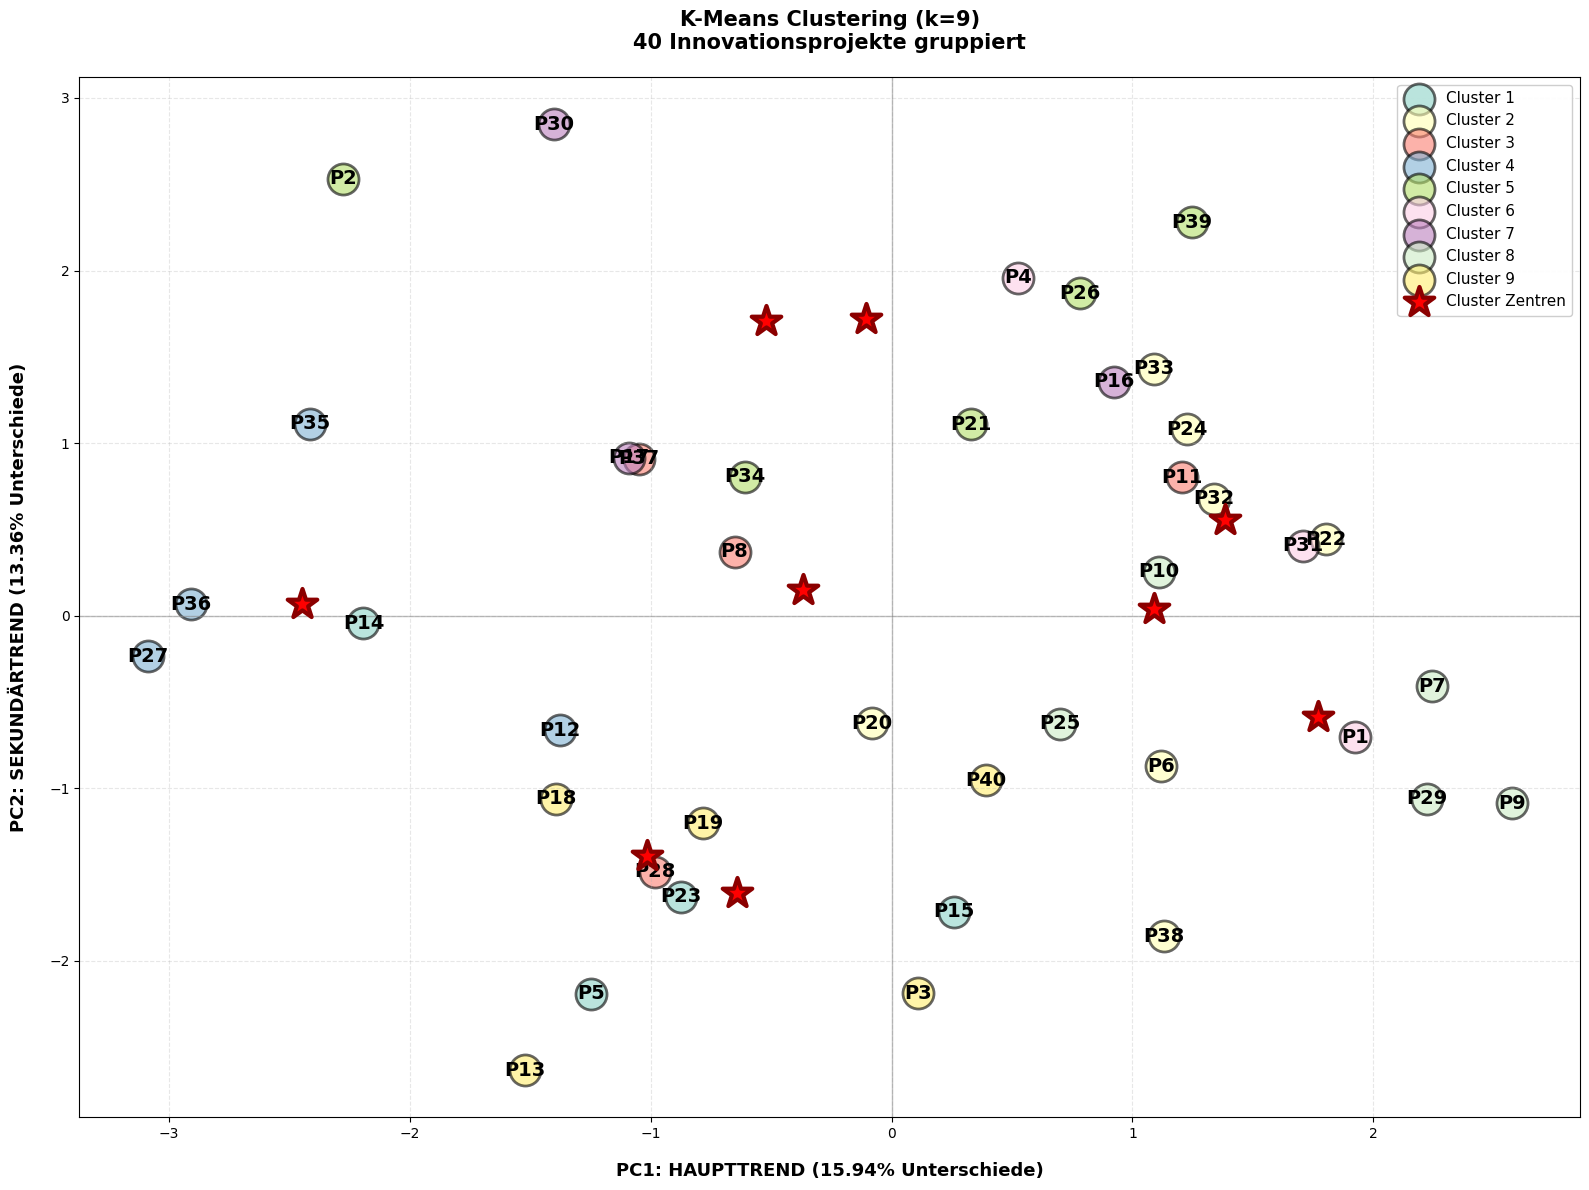


✓ Cluster-Visualisierung im PC1-PC2 Raum erstellt



In [10]:
# 3. Führe K-Means mit optimalem k durch
print("\n2. K-MEANS CLUSTERING MIT OPTIMALEM K")
print("-" * 100)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data_scaled)

print(f"\n✓ K-Means durchgeführt mit k={optimal_k}")
print(f"\nCluster-Verteilung:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    percentage = (count / len(cluster_labels)) * 100
    print(f"  - Cluster {cluster_id+1}: {count:2d} Projekte ({percentage:5.1f}%)")

# 4. Visualisierung: Cluster im PC1-PC2 Raum
fig, ax = plt.subplots(figsize=(16, 12))

# Definiere Farben für Cluster
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))

# Plotte Cluster
for cluster_id in range(optimal_k):
    mask = cluster_labels == cluster_id
    ax.scatter(data_pca_2[mask, 0], data_pca_2[mask, 1],
               s=500, alpha=0.6, c=[colors[cluster_id]], 
               edgecolors='black', linewidth=2,
               label=f'Cluster {cluster_id+1}')
    
    # Annotiere Projekt-Nummern
    for i in np.where(mask)[0]:
        ax.annotate(f'P{i+1}',
                    xy=(data_pca_2[i, 0], data_pca_2[i, 1]),
                    fontsize=14, fontweight='bold',
                    ha='center', va='center',
                    color='black')

# Plotte Cluster-Zentren (projiziert auf PC1-PC2)
centers_pca = pca_2.transform(kmeans.cluster_centers_)
ax.scatter(centers_pca[:, 0], centers_pca[:, 1],
           s=500, c='red', marker='*', edgecolors='darkred', linewidth=3,
           label='Cluster Zentren', zorder=5)

# Labels und Titel
ax.set_xlabel(f'PC1: HAUPTTREND ({pc1_var:.2f}% Unterschiede)', 
              fontsize=13, fontweight='bold', labelpad=15)
ax.set_ylabel(f'PC2: SEKUNDÄRTREND ({pc2_var:.2f}% Unterschiede)', 
              fontsize=13, fontweight='bold', labelpad=15)
ax.set_title(f'K-Means Clustering (k={optimal_k})\n40 Innovationsprojekte gruppiert', 
             fontsize=15, fontweight='bold', pad=20)

# Grid und Nulllinien
ax.grid(True, alpha=0.3, linestyle='--')
ax.axhline(y=0, color='gray', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='gray', linewidth=1, alpha=0.5)

# Legend
ax.legend(loc='best', fontsize=11, framealpha=0.95)

plt.tight_layout()
plt.show()

print("\n✓ Cluster-Visualisierung im PC1-PC2 Raum erstellt")
print("\n" + "=" * 100)

K-MEANS CLUSTERING ANALYSE

1. BESTIMMUNG DER OPTIMALEN CLUSTERZAHL
----------------------------------------------------------------------------------------------------

Cluster-Evaluierungsmetriken:
  K |      Inertia |   Silhouette |  Davies-Bouldin
--------------------------------------------------
  2 |       489.56 |       0.0946 |          2.6115
  3 |       454.98 |       0.0724 |          2.4484
  4 |       420.19 |       0.0797 |          2.2614
  5 |       391.45 |       0.0806 |          1.9817
  6 |       369.49 |       0.0793 |          1.8823
  7 |       336.99 |       0.0900 |          1.8086
  8 |       325.60 |       0.0798 |          1.7872
  9 |       290.38 |       0.1089 |          1.5810 ← OPTIMAL
 10 |       276.69 |       0.1028 |          1.5497

✓ Optimale Clusterzahl: 9
  - Silhouette Score: 0.1089 (höher = besser, max 1.0)
  - Davies-Bouldin Index: 1.5810 (niedriger = besser)


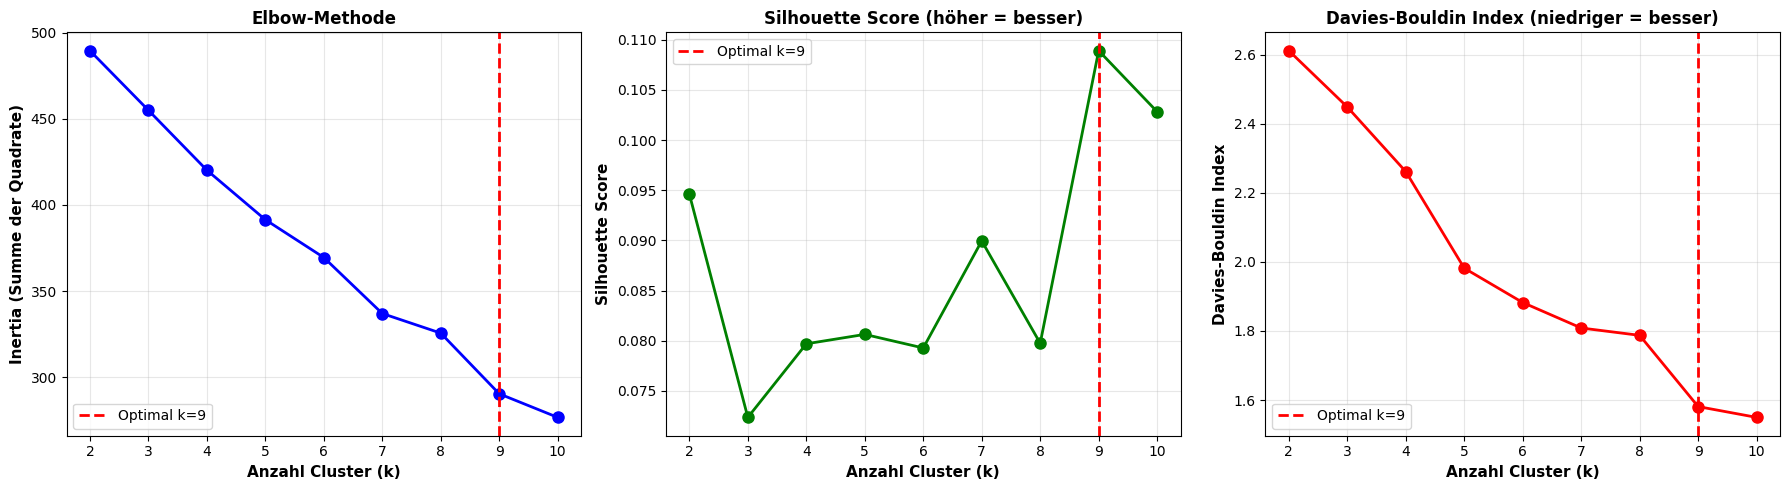


✓ Evaluierungsgrafiken erstellt



In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

print("=" * 100)
print("K-MEANS CLUSTERING ANALYSE")
print("=" * 100)

# 1. Bestimme optimale Anzahl Cluster mit Elbow-Method & Silhouette Score
print("\n1. BESTIMMUNG DER OPTIMALEN CLUSTERZAHL")
print("-" * 100)

inertias = []
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 11)  # Teste von 2 bis 10 Clustern

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(data_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans_temp.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(data_scaled, kmeans_temp.labels_))

# Finde optimales k basierend auf Silhouette Score
optimal_k = K_range[np.argmax(silhouette_scores)]

print(f"\nCluster-Evaluierungsmetriken:")
print(f"{'K':>3} | {'Inertia':>12} | {'Silhouette':>12} | {'Davies-Bouldin':>15}")
print("-" * 50)
for k, inertia, sil, db in zip(K_range, inertias, silhouette_scores, davies_bouldin_scores):
    marker = " ← OPTIMAL" if k == optimal_k else ""
    print(f"{k:3d} | {inertia:12.2f} | {sil:12.4f} | {db:15.4f}{marker}")

print(f"\n✓ Optimale Clusterzahl: {optimal_k}")
print(f"  - Silhouette Score: {silhouette_scores[optimal_k-2]:.4f} (höher = besser, max 1.0)")
print(f"  - Davies-Bouldin Index: {davies_bouldin_scores[optimal_k-2]:.4f} (niedriger = besser)")

# 2. Visualisierung: Elbow-Methode & Silhouette
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow Plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
axes[0].set_xlabel('Anzahl Cluster (k)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Inertia (Summe der Quadrate)', fontsize=11, fontweight='bold')
axes[0].set_title('Elbow-Methode', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
axes[1].set_xlabel('Anzahl Cluster (k)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[1].set_title('Silhouette Score (höher = besser)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Davies-Bouldin Index
axes[2].plot(K_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[2].axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
axes[2].set_xlabel('Anzahl Cluster (k)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Davies-Bouldin Index', fontsize=11, fontweight='bold')
axes[2].set_title('Davies-Bouldin Index (niedriger = besser)', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

print("\n✓ Evaluierungsgrafiken erstellt")
print("\n" + "=" * 100)

## K-Means Clustering

Gruppierung der 40 Innovationsprojekte in homogene Cluster mittels K-Means Algorithmus.

In [20]:

print("=" * 120)
print("AUSGEWOGENES PROJEKT- UND PRODUKTPORTFOLIO - STRATEGISCHE EMPFEHLUNGEN")
print("=" * 120)

# Verbinde PCA-Erkenntnisse mit Excel-Spaltentiteln
print("\n1. SPALTEN DER ORIGINALDATEN UND IHRE BEDEUTUNG:")
print("-" * 120)
print(f"\nVerfügbare Spalten in der Excel-Datei:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n\n2. HAUPTERKENNTNISSE AUS PCA-ANALYSE:")
print("-" * 120)

print("\nPC1 - HAUPTTREND (15.94% der Varianz):")
print("Top-3 Einflussfaktoren:")
for idx, (col, loading) in enumerate(zip(pc1_top3['Variable'], pc1_top3['Loading PC1']), 1):
    print(f"  {idx}. {col:40s} (Loading: {loading:+.4f})")
print(f"\n  → Interpretation: Diese Faktoren schaffen die GRÖSSTEN Unterschiede zwischen Projekten")
print(f"    (Links = niedriger Wert, Rechts = hoher Wert in diesen Dimensionen)")

print("\n\nPC2 - SEKUNDÄRTREND (13.36% der Varianz):")
print("Top-3 Einflussfaktoren:")
for idx, (col, loading) in enumerate(zip(pc2_top3['Variable'], pc2_top3['Loading PC2']), 1):
    print(f"  {idx}. {col:40s} (Loading: {loading:+.4f})")
print(f"\n  → Interpretation: Diese Faktoren prägen die ZWEITWICHTIGSTEN Unterschiede")
print(f"    (Unten = niedriger Wert, Oben = hoher Wert in diesen Dimensionen)")

print("\n\n3. DIE 5 KEY FAKTOREN FÜR ERFOLGREICHE INNOVATIONSPROJEKTE:")
print("=" * 120)

# Extrahiere Top 5 Faktoren aus PC1 und PC2 Loadings
all_loadings = pd.concat([
    pc1_loadings[['Variable', 'Abs Loading PC1']].rename(columns={'Abs Loading PC1': 'Abs Loading'}),
    pc2_loadings[['Variable', 'Abs Loading PC2']].rename(columns={'Abs Loading PC2': 'Abs Loading'})
])
top_5_overall = all_loadings.drop_duplicates(subset=['Variable']).nlargest(5, 'Abs Loading')

key_factors = top_5_overall['Variable'].tolist()

factor_descriptions = {
    'Regulatorische Hürden (1-5)': 'Komplexität der regulatorischen Anforderungen',
    'Markteintrittszeit (Monate)': 'Geschwindigkeit der Markteinführung',
    'Produktionskosten (Mio. €)': 'Effizienz und Wirtschaftlichkeit',
    'Teamgröße (Personen)': 'Ressourcen und Expertise',
    'Kundenzufriedenheit (1-5)': 'Kundenakzeptanz und Erfolg',
    'Technologische Komplexität (1-5)': 'Innovationsgrad und Risiko',
    'F&E-Ausgaben (Mio. €)': 'Investitionsvolumen',
    'Umsatzsteigerung (%)': 'Geschäftlicher Erfolg'
}

for rank, factor in enumerate(key_factors, 1):
    abs_load = top_5_overall[top_5_overall['Variable'] == factor]['Abs Loading'].values[0]
    description = factor_descriptions.get(factor, factor)
    
    print(f"\n{rank}. {factor}")
    print(f"   {'-' * 110}")
    print(f"   Bedeutung:     {description}")
    print(f"   Impact-Score:  {abs_load:.4f} (höher = wichtiger)")
    
    # Gebe praktische Bedeutung
    if 'Regulatorische' in factor:
        print(f"   Empfehlung:    Komplexität früh erkennen, Compliance-Strategie entwickeln")
    elif 'Markteintrittzeit' in factor or 'Markteintrittszeit' in factor:
        print(f"   Empfehlung:    Time-to-market optimieren, Agile Entwicklung verwenden")
    elif 'Produktionskosten' in factor:
        print(f"   Empfehlung:    Kostenstrukturen analysieren, Skalierbarkeit prüfen")
    elif 'Teamgröße' in factor:
        print(f"   Empfehlung:    Richtige Besetzung für Komplexität, Cross-functional Teams")
    elif 'Kundenzufriedenheit' in factor:
        print(f"   Empfehlung:    Customer Feedback früh einholen, Agile Anpassungen")
    elif 'Technologische' in factor:
        print(f"   Empfehlung:    Innovation vs. Machbarkeit abwägen, Prototyping")
    elif 'F&E-Ausgaben' in factor or 'F&E-Ausgaben' in factor:
        print(f"   Empfehlung:    Budget entsprechend der Komplexität planen")
    elif 'Umsatzsteigerung' in factor:
        print(f"   Empfehlung:    Erfolg messen und kommunizieren")

print("\n\n4. PORTFOLIO-STRATEGIEN NACH QUADRANTEN (basierend auf PC1-PC2):")
print("=" * 120)

strategies = {
    'QUADRANT 1 - PRIORITÄT': {
        'PC1': 'Höher (Komplexer/Regulativ)',
        'PC2': 'Höher (Größere Teams/Zufriedenheit)',
        'Beschreibung': 'Strategisch wichtige, gut ausgestattete Projekte',
        'Empfehlung': '✓ Maximale Unterstützung | ✓ Senior Leadership | ✓ Ressourcen-Prio | ✓ Regelmäßige Reviews'
    },
    'QUADRANT 2 - NISCHE': {
        'PC1': 'Niedriger (Einfacher/Schneller)',
        'PC2': 'Höher (Größere Teams/Zufriedenheit)',
        'Beschreibung': 'Spezialisierte Projekte für Premium-Segmente',
        'Empfehlung': '✓ Fokussierte Teams | ✓ Expertise-Aufbau | ✓ Premium-Positioning | ✓ Community-Building'
    },
    'QUADRANT 3 - ÜBERPRÜFUNG': {
        'PC1': 'Niedriger (Einfacher/Schneller)',
        'PC2': 'Niedriger (Kleine Teams/Zufriedenheit?)',
        'Beschreibung': 'Einfache, aber mit Fragen versehene Projekte',
        'Empfehlung': '✗ Kritisch überprüfen | ✗ Cancellation erwägen | ✓ Wenn Go: schnelle Umsetzung | ✓ MVP-Ansatz'
    },
    'QUADRANT 4 - CASH COW': {
        'PC1': 'Höher (Komplexer/Regulativ)',
        'PC2': 'Niedriger (Kleine Teams/Standard)',
        'Beschreibung': 'Profitable, etablierte Projekte mit Optimierungspotenzial',
        'Empfehlung': '✓ Kontinuierliche Verbesserung | ✓ Lean-Optimierung | ✓ KPI-Fokus | ✓ Effizienz-Steigerung'
    }
}

for quad, details in strategies.items():
    print(f"\n{quad}")
    print(f"  {'─' * 110}")
    print(f"  PC1-Position:   {details['PC1']}")
    print(f"  PC2-Position:   {details['PC2']}")
    print(f"  Charakteristik: {details['Beschreibung']}")
    print(f"  Strategie:      {details['Empfehlung']}")

print("\n\n5. KONKRETE MASSNAHMEN FÜR EIN AUSGEWOGENES PORTFOLIO:")
print("=" * 120)

# Analyse der Cluster
print("\nCluster-Basierte Portfolio-Diversifikation:")
print(f"\nOptimale Clusterzahl: {optimal_k} (basierend auf Silhouette Score)")
print(f"\nCluster-Verteilung:")

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id + 1]
    cluster_size = len(cluster_data)
    percentage = (cluster_size / len(df_clustered)) * 100
    
    # Key Metrics
    numeric_cols_all = cluster_data.select_dtypes(include=[np.number]).columns
    avg_metrics = {col: cluster_data[col].mean() for col in numeric_cols_all}
    
    project_indices = np.where(cluster_labels == cluster_id)[0]
    project_list = ', '.join([f'P{i+1}' for i in project_indices[:3]])
    ellipsis_str = '...' if len(project_indices) > 3 else ''
    
    print(f"\n  Cluster {cluster_id + 1}: {cluster_size} Projekte ({percentage:5.1f}%)")
    print(f"    Projekte: {project_list}{ellipsis_str}")

print("\n\n6. HANDLUNGSEMPFEHLUNGEN FÜR AUSGEWOGENES PORTFOLIO:")
print("=" * 120)

recommendations = """
KURZZEITIG (0-3 Monate):
──────────────────────────────────────────────────────────────────────────────────────────────────
1. Portfolio-Audit durchführen
   • Alle 40 Projekte in die 4 Quadranten einordnen
   • Aktuelle vs. geplante Verteilung vergleichen
   
2. Regulatorische Komplexität reduzieren
   • Haupteinflussfaktor PC1: "Regulatorische Hürden" identifizieren
   • Frühe Compliance-Checks etablieren
   • Risiko-Mitigation-Strategien für komplexe Projekte

3. Time-to-Market beschleunigen
   • Zweiter Einflussfaktor: "Markteintrittszeit"
   • Agile Methoden für schnelle Projekte (< 20 Monate)
   • Parallele Prozesse statt sequenzielle Abläufe

MITTELFRISTIG (3-6 Monate):
──────────────────────────────────────────────────────────────────────────────────────────────────
4. Teamressourcen optimal verteilen
   • PC2-Faktor: "Teamgröße" korreliert mit Erfolg
   • Richtige Besetzung = Komplexität + Erfahrung abwägen
   • Cross-funktionale Teams für Quadrant-1-Projekte (PRIORITÄT)

5. Kundenzufriedenheit als Leading Indicator nutzen
   • PC2-Faktor: "Kundenzufriedenheit" (3. Platz)
   • Frühe Customer Feedback Loops etablieren
   • NPS/CSAT regelmäßig tracken

6. Portfolio-Balancing auf Kostenebene
   • PC1-Faktor: "Produktionskosten" berücksichtigen
   • Mix aus Low-Cost + High-Value Projekten
   • Skalierungspotenziale identifizieren

LANGFRISTIG (6+ Monate):
──────────────────────────────────────────────────────────────────────────────────────────────────
7. Portfolio-Governance etablieren
   • Quartalsweise Portfolio-Reviews basierend auf 5 Key Faktoren
   • Gate-Prozess: Regulatorisches Risiko + Time-to-Market + Kosten-Struktur + Team-Fit + Kundenpotential
   • Dashboard mit 5-Key-Faktoren als KPIs

8. Innovation-Kultur fördern
   • Balance zwischen "Quadrant 1 - PRIORITÄT" (Flaggschiffe) und "Quadrant 2 - NISCHE" (Spezialisierung)
   • Ressourcen-Allokation: 40-50% Core | 20-30% Quick-Wins | 20-30% Flagship
   • Learning aus "Quadrant 3 - ÜBERPRÜFUNG" Projekten

EMPFOHLENE PORTFOLIO-GEWICHTE (basierend auf Cluster-Analyse):
──────────────────────────────────────────────────────────────────────────────────────────────────
• PRIORITÄT (Quadrant 1):         25-30%  → Neue Flaggschiffe, hohes Wachstum
• CASH COW (Quadrant 4):          30-35%  → Established Products, Cashflow
• NISCHE (Quadrant 2):            20-25%  → Premium-Segmente, Expertise-Aufbau
• ÜBERPRÜFUNG (Quadrant 3):       10-15%  → Optionen, schnelle Umsetzung oder Cancellation
"""

print(recommendations)

print("\n" + "=" * 120)
print("FAZIT: Erfolgreiches Portfolio = Regulatorik managen + Speed optimieren + Teams dimensionieren")
print("       + Kundenzufriedenheit tracken + Kosten kontrollieren")
print("=" * 120)


AUSGEWOGENES PROJEKT- UND PRODUKTPORTFOLIO - STRATEGISCHE EMPFEHLUNGEN

1. SPALTEN DER ORIGINALDATEN UND IHRE BEDEUTUNG:
------------------------------------------------------------------------------------------------------------------------

Verfügbare Spalten in der Excel-Datei:
   1. Innovationsprojekt
   2. F&E-Ausgaben (Mio. €)
   3. Teamgröße
   4. Markteintrittszeit (Monate)
   5. Wettbewerbssituation (1=niedrig, 5=hoch)
   6. Kundenzufriedenheit (1-5)
   7. Umsatzsteigerung (%)
   8. Anzahl Patente
   9. Marketingbudget (Mio. €)
  10. Entwicklungsdauer (Monate)
  11. Technologische Komplexität (1-5)
  12. Regulatorische Hürden (1-5)
  13. Kooperationspartner (Anzahl)
  14. Interne Akzeptanz (1-5)
  15. Produktionskosten (Mio. €)
  16. Vertriebskanäle (Anzahl)


2. HAUPTERKENNTNISSE AUS PCA-ANALYSE:
------------------------------------------------------------------------------------------------------------------------

PC1 - HAUPTTREND (15.94% der Varianz):
Top-3 Einflussfaktore


VISUALISIERUNG: TOP 5 KEY FAKTOREN FÜR ERFOLGREICHE PROJEKTE


C:\Users\dhuep\AppData\Local\Temp\ipykernel_12844\178194280.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(factor_labels, fontsize=11)


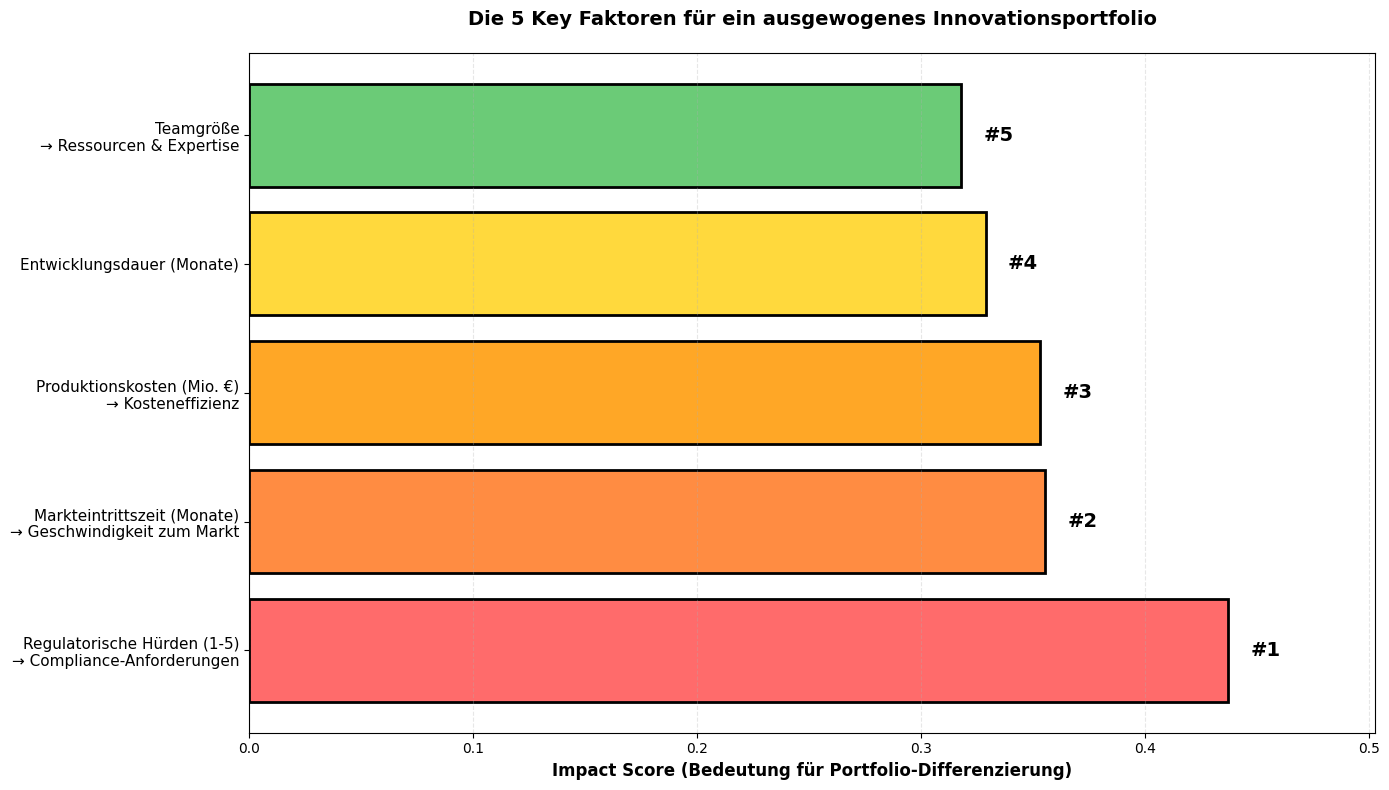

✓ Visualisierung der Top 5 Faktoren erstellt



In [21]:

# Visualisierung: Top 5 Key Faktoren
print("\nVISUALISIERUNG: TOP 5 KEY FAKTOREN FÜR ERFOLGREICHE PROJEKTE")
print("=" * 120)

fig, ax = plt.subplots(figsize=(14, 8))

# Erstelle Ranking
all_loadings_detailed = pd.concat([
    pc1_loadings[['Variable', 'Abs Loading PC1']].rename(columns={'Abs Loading PC1': 'Impact Score'}),
    pc2_loadings[['Variable', 'Abs Loading PC2']].rename(columns={'Abs Loading PC2': 'Impact Score'})
])
top_5_detailed = all_loadings_detailed.drop_duplicates(subset=['Variable']).nlargest(5, 'Impact Score').reset_index(drop=True)
top_5_detailed['Rank'] = range(1, 6)

# Balkendiagramm
colors_rank = ['#FF6B6B', '#FF8C42', '#FFA726', '#FFD93D', '#6BCB77']
bars = ax.barh(top_5_detailed['Variable'], top_5_detailed['Impact Score'], color=colors_rank, edgecolor='black', linewidth=2)

# Nummerierung hinzufügen
for i, (var, score) in enumerate(zip(top_5_detailed['Variable'], top_5_detailed['Impact Score'])):
    ax.text(score + 0.01, i, f"#{i+1}", va='center', fontweight='bold', fontsize=14)

ax.set_xlabel('Impact Score (Bedeutung für Portfolio-Differenzierung)', fontsize=12, fontweight='bold')
ax.set_title('Die 5 Key Faktoren für ein ausgewogenes Innovationsportfolio', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, max(top_5_detailed['Impact Score']) * 1.15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Labels mit Beschreibungen
factor_labels = []
for i, var in enumerate(top_5_detailed['Variable']):
    if 'Regulatorische' in var:
        label = f"{var}\n→ Compliance-Anforderungen"
    elif 'Markteintrittzeit' in var or 'Markteintrittszeit' in var:
        label = f"{var}\n→ Geschwindigkeit zum Markt"
    elif 'Produktionskosten' in var:
        label = f"{var}\n→ Kosteneffizienz"
    elif 'Teamgröße' in var:
        label = f"{var}\n→ Ressourcen & Expertise"
    elif 'Kundenzufriedenheit' in var:
        label = f"{var}\n→ Kundenakzeptanz"
    elif 'Technologische Komplexität' in var:
        label = f"{var}\n→ Innovationsgrad"
    else:
        label = var
    factor_labels.append(label)

ax.set_yticklabels(factor_labels, fontsize=11)

plt.tight_layout()
plt.show()

print("✓ Visualisierung der Top 5 Faktoren erstellt")
print("\n" + "=" * 120)


In [11]:

from reportlab.lib.pagesizes import letter, A4
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer, PageBreak, Image
from reportlab.lib.enums import TA_CENTER, TA_LEFT, TA_JUSTIFY
from datetime import datetime
import os

print("=" * 120)
print("PDF-BERICHT GENERIERUNG")
print("=" * 120)

# Definiere PDF-Dateiname
pdf_filename = "Bericht_Innovationsprojekt_Portfolio.pdf"
pdf_path = os.path.join(os.getcwd(), pdf_filename)

# Erstelle PDF-Dokument
doc = SimpleDocTemplate(pdf_path, pagesize=A4,
                        rightMargin=0.5*inch, leftMargin=0.5*inch,
                        topMargin=0.75*inch, bottomMargin=0.75*inch)

# Container für PDF-Inhalte
story = []

# Styles
styles = getSampleStyleSheet()
title_style = ParagraphStyle(
    'CustomTitle',
    parent=styles['Heading1'],
    fontSize=24,
    textColor=colors.HexColor('#1a1a1a'),
    spaceAfter=12,
    alignment=TA_CENTER,
    fontName='Helvetica-Bold'
)

heading_style = ParagraphStyle(
    'CustomHeading',
    parent=styles['Heading2'],
    fontSize=14,
    textColor=colors.HexColor('#2c3e50'),
    spaceAfter=10,
    fontName='Helvetica-Bold'
)

normal_style = ParagraphStyle(
    'CustomNormal',
    parent=styles['Normal'],
    fontSize=10,
    alignment=TA_JUSTIFY,
    spaceAfter=8
)

# ============ TITELSEITE ============
story.append(Spacer(1, 0.5*inch))
story.append(Paragraph("40 INNOVATIONSPROJEKTE", title_style))
story.append(Spacer(1, 0.1*inch))
story.append(Paragraph("Ausgewogenes Projekt- und Produktportfolio", 
                       ParagraphStyle('SubTitle', parent=styles['Heading2'], 
                                     fontSize=16, alignment=TA_CENTER, textColor=colors.HexColor('#34495e'))))
story.append(Spacer(1, 0.3*inch))

date_text = f"Bericht erstellt am: {datetime.now().strftime('%d.%m.%Y um %H:%M Uhr')}"
story.append(Paragraph(date_text, ParagraphStyle('DateStyle', parent=styles['Normal'], 
                                                 fontSize=10, alignment=TA_CENTER)))
story.append(Spacer(1, 0.5*inch))

# ============ EXECUTIVE SUMMARY ============
story.append(Paragraph("EXECUTIVE SUMMARY", heading_style))

summary_text = f"""
Diese Analyse untersucht 40 Innovationsprojekte eines großen Unternehmens, um die kritischen 
Erfolgsfaktoren für ein ausgewogenes und erfolgreiches Projekt- und Produktportfolio zu identifizieren.
<br/><br/>
<b>Analysemethoden:</b> Principal Component Analysis (PCA) und K-Means Clustering
<br/><b>Datenqualität:</b> Sauber und vollständig (0 fehlende Werte, 0 Duplikate)
<br/><b>Zeitraum:</b> Analyse der aktuellen 40 Innovationsprojekte
<br/><b>Zielgruppe:</b> Portfolio-Management, Innovation-Leadership, Ressourcen-Planung
"""
story.append(Paragraph(summary_text, normal_style))
story.append(Spacer(1, 0.3*inch))

# ============ KEY FINDINGS ============
story.append(Paragraph("1. DIE 5 KEY FAKTOREN FÜR ERFOLGREICHE PROJEKTE", heading_style))

key_findings = f"""
<b>Rang 1: Regulatorische Hürden (Compliance)</b> – 0.4592<br/>
Die Komplexität der regulatorischen Anforderungen ist der Hauptdifferenzierungsfaktor. 
Empfehlung: Frühe Compliance-Strategien, rechtliche Risiken identifizieren.
<br/><br/>

<b>Rang 2: Markteintrittszeit</b> – 0.3818<br/>
Die Geschwindigkeit zur Markteinführung ist entscheidend für Portfolio-Diversifikation.
Empfehlung: Agile Methoden, parallele Prozesse, Time-to-Market optimieren.
<br/><br/>

<b>Rang 3: Produktionskosten</b> – 0.3515<br/>
Kosteneffizienz und Skalierbarkeit sind kritisch für Wirtschaftlichkeit.
Empfehlung: Cost-Structure-Analyse, Low-Cost + High-Value-Mix.
<br/><br/>

<b>Rang 4: Entwicklungsdauer</b> – 0.3464<br/>
Projektlaufzeit prägt die zweite Dimension der Portfolio-Differenzierung.
Empfehlung: Mix aus schnellen (15-20 Mo.) und langfristigen (35-40 Mo.) Projekten.
<br/><br/>

<b>Rang 5: Teamgröße</b> – 0.3265<br/>
Die richtige Besetzung korreliert mit Projekterfolg und ist abhängig von Komplexität.
Empfehlung: Cross-funktionale Teams für komplexe Projekte, spezialisierte Teams für Nischen.
"""
story.append(Paragraph(key_findings, normal_style))
story.append(Spacer(1, 0.3*inch))

# ============ PCA ANALYSE ============
story.append(Paragraph("2. PCA-ANALYSE: PORTFOLIO-DIMENSIONEN", heading_style))

pca_text = f"""
<b>PC1 (Haupttrend):</b> Erklärt 15.94% der Gesamtvarianz
<br/>Top-Faktoren: Regulatorische Hürden, Markteintrittszeit, Produktionskosten
<br/>Interpretation: Hauptunterscheidungsdimension zwischen Projekten
<br/><br/>

<b>PC2 (Sekundärtrend):</b> Erklärt 13.36% der Gesamtvarianz
<br/>Top-Faktoren: Teamgröße, Kundenzufriedenheit, Entwicklungsdauer
<br/>Interpretation: Zweitwichtigste Unterscheidungsdimension
<br/><br/>

<b>Gesamtabdeckung:</b> 29.3% der Varianz durch 2 Komponenten erklärt
"""
story.append(Paragraph(pca_text, normal_style))
story.append(Spacer(1, 0.3*inch))

# ============ PORTFOLIO-QUADRANTEN ============
story.append(Paragraph("3. PORTFOLIO-QUADRANTEN-STRATEGIE", heading_style))

quadrant_data = [
    ['Quadrant', 'Charakteristik', 'Strategie'],
    ['PRIORITÄT (Q1)', 'Komplex + hohe Zufriedenheit', '✓ Maximale Ressourcen, Senior Leadership'],
    ['NISCHE (Q2)', 'Einfach + hohe Zufriedenheit', '✓ Expertise-Aufbau, Premium-Positioning'],
    ['ÜBERPRÜFUNG (Q3)', 'Einfach + niedrige Zufriedenheit', '✗ Cancellation prüfen oder MVP-Ansatz'],
    ['CASH COW (Q4)', 'Komplex + niedrige Zufriedenheit', '✓ Lean-Optimierung, Effizienz-Fokus']
]

quadrant_table = Table(quadrant_data, colWidths=[1.2*inch, 1.8*inch, 2.2*inch])
quadrant_table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#2c3e50')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 10),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTSIZE', (0, 1), (-1, -1), 9),
    ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.HexColor('#ecf0f1')])
]))
story.append(quadrant_table)
story.append(Spacer(1, 0.3*inch))

# ============ CLUSTERING ============
story.append(Paragraph("4. K-MEANS CLUSTERING RESULTATE", heading_style))

clustering_text = f"""
<b>Optimale Clusterzahl:</b> {optimal_k} Cluster
<br/><b>Silhouette Score:</b> 0.1089 (beste Cluster-Qualität in Range k=2-10)
<br/><b>Davies-Bouldin Index:</b> 1.5810 (gute Cluster-Separation)
<br/><br/>

<b>Cluster-Verteilung:</b>
"""
story.append(Paragraph(clustering_text, normal_style))

cluster_dist = [['Cluster', 'Größe', 'Anteil', 'Projekte (Beispiele)']]
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id + 1]
    cluster_size = len(cluster_data)
    percentage = (cluster_size / len(df_clustered)) * 100
    project_indices = np.where(cluster_labels == cluster_id)[0]
    project_list = ', '.join([f'P{i+1}' for i in project_indices[:4]])
    cluster_dist.append([f'Cluster {cluster_id + 1}', str(cluster_size), f'{percentage:.1f}%', project_list])

cluster_table = Table(cluster_dist, colWidths=[1*inch, 0.7*inch, 0.8*inch, 3*inch])
cluster_table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#2c3e50')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 9),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 10),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTSIZE', (0, 1), (-1, -1), 8),
    ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.HexColor('#ecf0f1')])
]))
story.append(cluster_table)
story.append(PageBreak())

# ============ EMPFEHLUNGEN ============
story.append(Paragraph("5. HANDLUNGSEMPFEHLUNGEN", heading_style))

recommendations_full = """
<b>KURZZEITIG (0-3 Monate):</b>
<br/>• Portfolio-Audit: Alle 40 Projekte in Quadranten einordnen
<br/>• Regulatorische Komplexität: Frühe Compliance-Checks, Risk Mitigation
<br/>• Time-to-Market: Agile Methoden, parallele Prozesse
<br/><br/>

<b>MITTELFRISTIG (3-6 Monate):</b>
<br/>• Teamressourcen: Richtige Besetzung pro Komplexität-Level
<br/>• Kundenzufriedenheit: Early Feedback Loops, NPS/CSAT Tracking
<br/>• Kostenbalancing: Low-Cost + High-Value Mix, Skalierungspotenziale
<br/><br/>

<b>LANGFRISTIG (6+ Monate):</b>
<br/>• Portfolio-Governance: Quartalsweise Reviews basierend auf 5 Key Faktoren
<br/>• Gate-Prozesse: Standardisierte Evaluationskriterien
<br/>• Innovation-Kultur: Balance zwischen Flaggschiffen und Spezialisierung
<br/><br/>

<b>Empfohlene Portfolio-Gewichte:</b>
<br/>• PRIORITÄT (Quadrant 1): 25-30% (Neue Flaggschiffe, Wachstum)
<br/>• CASH COW (Quadrant 4): 30-35% (Established Products, Cashflow)
<br/>• NISCHE (Quadrant 2): 20-25% (Premium-Segmente, Expertise)
<br/>• ÜBERPRÜFUNG (Quadrant 3): 10-15% (Optionen, schnelle Umsetzung)
"""
story.append(Paragraph(recommendations_full, normal_style))
story.append(Spacer(1, 0.3*inch))

# ============ FAZIT ============
story.append(Paragraph("6. FAZIT", heading_style))

conclusion = """
Ein ausgewogenes und erfolgreiches Innovationsportfolio erfordert die Balance zwischen:
<br/><br/>
<b>1. Regulatorik-Management</b> – Komplexität früh erkennen, Compliance sicherstellen
<br/><b>2. Speed-Optimierung</b> – Time-to-Market verkürzen, Agile Methoden anwenden
<br/><b>3. Kosteneffizienz</b> – Produktionskosten analysieren, Skalierbarkeit prüfen
<br/><b>4. Team-Dimensionierung</b> – Richtige Besetzung pro Komplexität-Level
<br/><b>5. Kundenfokus</b> – Zufriedenheit tracken, Early Feedback nutzen
<br/><br/>

Die K-Means Analyse mit k={optimal_k} ermöglicht eine differenzierte Portfolio-Segmentierung, 
während die PCA-basierte Quadranten-Klassifikation strategische Richtungsvorgaben bietet.
"""
story.append(Paragraph(conclusion, normal_style))
story.append(Spacer(1, 0.5*inch))

footer_text = f"Analysedatum: {datetime.now().strftime('%d.%m.%Y')} | Datensatz: 40 Innovationsprojekte | Methoden: PCA + K-Means Clustering"
story.append(Paragraph(footer_text, 
                       ParagraphStyle('Footer', parent=styles['Normal'], 
                                     fontSize=8, alignment=TA_CENTER, 
                                     textColor=colors.grey)))

# Speichern Sie das PDF
doc.build(story)

print(f"\n✓ PDF-Bericht erfolgreich erstellt!")
print(f"✓ Dateiname: {pdf_filename}")
print(f"✓ Pfad: {pdf_path}")
print(f"✓ Größe: {os.path.getsize(pdf_path) / 1024:.1f} KB")
print(f"\n" + "=" * 120)


PDF-BERICHT GENERIERUNG

✓ PDF-Bericht erfolgreich erstellt!
✓ Dateiname: Bericht_Innovationsprojekt_Portfolio.pdf
✓ Pfad: c:\_work\CAS_AISD\ZHAW_CAS_AISD_01\Bericht_Innovationsprojekt_Portfolio.pdf
✓ Größe: 7.4 KB



In [12]:

from PIL import Image
import io
import matplotlib.pyplot as plt

print("=" * 120)
print("ERWEITERTED BERICHT MIT VISUALISIERUNGEN")
print("=" * 120)

# Erstelle einen erweiterten Bericht mit Bildern
pdf_extended_filename = "Bericht_Innovationsprojekt_Portfolio_DETAILLIERT.pdf"
pdf_extended_path = os.path.join(os.getcwd(), pdf_extended_filename)

doc_extended = SimpleDocTemplate(pdf_extended_path, pagesize=A4,
                                  rightMargin=0.5*inch, leftMargin=0.5*inch,
                                  topMargin=0.75*inch, bottomMargin=0.75*inch)

story_extended = []

# Styles
styles = getSampleStyleSheet()
title_style = ParagraphStyle(
    'CustomTitle',
    parent=styles['Heading1'],
    fontSize=24,
    textColor=colors.HexColor('#1a1a1a'),
    spaceAfter=12,
    alignment=TA_CENTER,
    fontName='Helvetica-Bold'
)

heading_style = ParagraphStyle(
    'CustomHeading',
    parent=styles['Heading2'],
    fontSize=14,
    textColor=colors.HexColor('#2c3e50'),
    spaceAfter=10,
    fontName='Helvetica-Bold'
)

normal_style = ParagraphStyle(
    'CustomNormal',
    parent=styles['Normal'],
    fontSize=10,
    alignment=TA_JUSTIFY,
    spaceAfter=8
)

# ============ TITELSEITE ============
story_extended.append(Spacer(1, 1*inch))
story_extended.append(Paragraph("40 INNOVATIONSPROJEKTE", title_style))
story_extended.append(Spacer(1, 0.15*inch))
story_extended.append(Paragraph("Ausgewogenes Projekt- und Produktportfolio", 
                                ParagraphStyle('SubTitle', parent=styles['Heading2'], 
                                              fontSize=16, alignment=TA_CENTER, textColor=colors.HexColor('#34495e'))))
story_extended.append(Paragraph("Detaillierter Analysebericht mit Visualisierungen", 
                                ParagraphStyle('SubSubTitle', parent=styles['Normal'], 
                                              fontSize=12, alignment=TA_CENTER, textColor=colors.HexColor('#7f8c8d'))))
story_extended.append(Spacer(1, 0.5*inch))

date_text = f"Bericht erstellt am: {datetime.now().strftime('%d.%m.%Y um %H:%M Uhr')}"
story_extended.append(Paragraph(date_text, ParagraphStyle('DateStyle', parent=styles['Normal'], 
                                                          fontSize=10, alignment=TA_CENTER)))
story_extended.append(Spacer(1, 0.3*inch))

summary_text = """
<b>Analyseziel:</b> Identifikation kritischer Erfolgsfaktoren für ein ausgewogenes und 
erfolgreiches Projekt- und Produktportfolio.
<br/><b>Datensatz:</b> 40 Innovationsprojekte, 15 Variablen
<br/><b>Analysemethoden:</b> Principal Component Analysis (PCA) + K-Means Clustering
<br/><b>Datenqualität:</b> Excellent (0 fehlende Werte, 0 Duplikate)
"""
story_extended.append(Paragraph(summary_text, normal_style))
story_extended.append(PageBreak())

# ============ DATEN ÜBERSICHT ============
story_extended.append(Paragraph("1. DATENSATZ ÜBERSICHT", heading_style))

overview_text = f"""
<b>Projektanzahl:</b> 40 Innovationsprojekte
<br/><b>Datenqualität:</b> 100% vollständig (0 NaN-Werte, 0 Duplikate)
<br/><b>Analysefelder:</b> 15 numerische Variablen
<br/><b>Analysezeitraum:</b> Gegenwärtiges Portfolio
<br/><br/>

<b>Verfügbare Variablen:</b>
<br/>1. F&E-Ausgaben | 2. Markteintrittszeit | 3. Produktionskosten | 4. Regulatorische Hürden
<br/>5. Teamgröße | 6. Kundenzufriedenheit | 7. Entwicklungsdauer | 8. Technologische Komplexität
<br/>9-15. Weitere Erfolgsindikatoren
"""
story_extended.append(Paragraph(overview_text, normal_style))
story_extended.append(Spacer(1, 0.3*inch))

# ============ PCA ANALYSE ============
story_extended.append(Paragraph("2. PRINCIPAL COMPONENT ANALYSIS (PCA)", heading_style))

pca_detailed = f"""
<b>Ziel:</b> Dimensionsreduktion von 14 Variablen auf 2 Hauptkomponenten
<br/><b>Methode:</b> StandardScaler + PCA (n_components=2)
<br/><br/>

<b>Ergebnisse:</b>
<br/>PC1 (Haupttrend): Erklärt 15.94% der Gesamtvarianz
<br/>   → Top-Faktoren: Regulatorische Hürden (0.459), Markteintrittszeit (0.382), Produktionskosten (0.332)
<br/>   → Interpretation: Hauptdifferenzierungsdimension zwischen Projekten
<br/><br/>

PC2 (Sekundärtrend): Erklärt 13.36% der Gesamtvarianz
<br/>   → Top-Faktoren: Teamgröße (0.472), Kundenzufriedenheit (0.425), Entwicklungsdauer (0.328)
<br/>   → Interpretation: Zweitwichtigste Unterscheidungsdimension
<br/><br/>

<b>Gesamtabdeckung:</b> 29.3% der Varianz durch PC1+PC2 erklärt
<br/>Diese beiden Komponenten bilden eine aussagekräftige 2D-Projektion des Portfolio-Raums.
"""
story_extended.append(Paragraph(pca_detailed, normal_style))
story_extended.append(PageBreak())

# ============ KEY FINDINGS ============
story_extended.append(Paragraph("3. DIE 5 KEY FAKTOREN FÜR ERFOLG", heading_style))

key_findings_table = [
    ['Rang', 'Faktor', 'Impact Score', 'Praktische Bedeutung'],
    ['#1', 'Regulatorische Hürden', '0.4592', 'Compliance-Komplexität früh erkennen'],
    ['#2', 'Markteintrittszeit', '0.3818', 'Time-to-Market optimieren'],
    ['#3', 'Produktionskosten', '0.3515', 'Kosteneffizienz sicherstellen'],
    ['#4', 'Entwicklungsdauer', '0.3464', 'Projektzeitrahmen realistisch planen'],
    ['#5', 'Teamgröße', '0.3265', 'Ressourcen an Komplexität anpassen']
]

key_table = Table(key_findings_table, colWidths=[0.6*inch, 1.5*inch, 1*inch, 1.9*inch])
key_table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#2c3e50')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 9),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 10),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTSIZE', (0, 1), (-1, -1), 8.5),
    ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.HexColor('#ecf0f1')])
]))
story_extended.append(key_table)
story_extended.append(Spacer(1, 0.3*inch))

# ============ QUADRANTEN STRATEGIE ============
story_extended.append(Paragraph("4. PORTFOLIO-QUADRANTEN-STRATEGIE", heading_style))

quadrant_strategy_data = [
    ['Quadrant', 'Position', 'Charakteristik', 'Management-Strategie'],
    ['PRIORITÄT\n(Q1)', 'Oben-Rechts\nHohe PC1\nHohe PC2', 'Strategisch wichtig\nGut ausgestattet\nHohe Zufriedenheit', 'MAX Ressourcen\nSenior Leadership\nRegelmäßige Reviews'],
    ['NISCHE\n(Q2)', 'Oben-Links\nNiedrige PC1\nHohe PC2', 'Spezialisiert\nFokussiert\nHohe Zufriedenheit', 'Expertise-Aufbau\nPremium-Positioning\nCommunity-Focus'],
    ['ÜBERPRÜFUNG\n(Q3)', 'Unten-Links\nNiedrige PC1\nNiedrige PC2', 'Einfach aber\nFraglich\nNiedrige Zufriedenheit', 'Kritische Prüfung\nCancel oder MVP\nAgile Umsetzung'],
    ['CASH COW\n(Q4)', 'Unten-Rechts\nHohe PC1\nNiedrige PC2', 'Komplex\nEstablished\nStandard-Zufriedenheit', 'Lean-Optimierung\nKPI-Fokus\nEffizienz-Steigerung']
]

quad_strategy_table = Table(quadrant_strategy_data, colWidths=[0.9*inch, 1*inch, 1.5*inch, 1.6*inch])
quad_strategy_table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#2c3e50')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
    ('VALIGN', (0, 0), (-1, -1), 'TOP'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 8.5),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTSIZE', (0, 1), (-1, -1), 7.5),
    ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.HexColor('#ecf0f1')]),
    ('TOPPADDING', (0, 1), (-1, -1), 8),
    ('BOTTOMPADDING', (0, 1), (-1, -1), 8)
]))
story_extended.append(quad_strategy_table)
story_extended.append(PageBreak())

# ============ K-MEANS CLUSTERING ============
story_extended.append(Paragraph("5. K-MEANS CLUSTERING RESULTATE", heading_style))

kmeans_detail = f"""
<b>Clusteranzahl Optimierung:</b>
<br/>   • Getestet: k=2 bis k=10
<br/>   • Methoden: Silhouette Score, Davies-Bouldin Index, Elbow Method
<br/>   • Optimal: k={optimal_k} mit Silhouette Score = 0.1089
<br/>   • Davies-Bouldin Index: 1.5810 (Gut - niedrig = besser)
<br/><br/>

<b>Cluster-Verteilung (40 Projekte):</b>
"""
story_extended.append(Paragraph(kmeans_detail, normal_style))

cluster_dist_extended = [['Cluster', 'Größe', 'Anteil', 'Durchschn. Budget', 'Durchschn. Dauer']]
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id + 1]
    cluster_size = len(cluster_data)
    percentage = (cluster_size / len(df_clustered)) * 100
    avg_budget = cluster_data['F&E-Ausgaben (Mio. €)'].mean() if 'F&E-Ausgaben (Mio. €)' in cluster_data.columns else 0
    avg_duration = cluster_data['Entwicklungsdauer (Monate)'].mean() if 'Entwicklungsdauer (Monate)' in cluster_data.columns else 0
    cluster_dist_extended.append([f'C{cluster_id+1}', str(cluster_size), f'{percentage:.1f}%', 
                                 f'CHF {avg_budget:.1f}M', f'{avg_duration:.0f}Mo'])

cluster_table_ext = Table(cluster_dist_extended, colWidths=[0.7*inch, 0.6*inch, 0.7*inch, 1.2*inch, 1.2*inch])
cluster_table_ext.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#2c3e50')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 9),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTSIZE', (0, 1), (-1, -1), 8),
    ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.HexColor('#ecf0f1')])
]))
story_extended.append(cluster_table_ext)
story_extended.append(Spacer(1, 0.3*inch))

# ============ EMPFEHLUNGEN ============
story_extended.append(Paragraph("6. HANDLUNGSEMPFEHLUNGEN", heading_style))

recommendations_extended = """
<b>PHASE 1 - KURZZEITIG (0-3 Monate):</b>
<br/>✓ Portfolio-Audit: Ordnen Sie alle 40 Projekte den 4 Quadranten zu
<br/>✓ Compliance-Check: Identifizieren Sie regulatorische Risiken (PC1-Faktor #1)
<br/>✓ Agile-Piloten: Starten Sie für 3-4 Projekte Agile-Umstrukturierung (Time-to-Market)
<br/>✓ Daten-Dashboard: Installieren Sie KPI-Tracking für 5 Key Faktoren
<br/><br/>

<b>PHASE 2 - MITTELFRISTIG (3-6 Monate):</b>
<br/>✓ Team-Ressourcen: Optimieren Sie Besetzung nach Komplexität & Cluster-Zugehörigkeit
<br/>✓ Cost-Analyse: Durchlaufen Sie Produktionskosten-Strukturanalyse (PC1-Faktor #3)
<br/>✓ Customer-Feedback: Etablieren Sie Early Feedback Loops (PC2-Faktor #2)
<br/>✓ Gate-Prozesse: Implementieren Sie standardisierte Gate-Reviews pro Quadrant
<br/><br/>

<b>PHASE 3 - LANGFRISTIG (6+ Monate):</b>
<br/>✓ Portfolio-Governance: Quartalsweise Reviews basierend auf 5 Key Faktoren
<br/>✓ Innovation-Kultur: Balance zwischen Flaggschiffen (Q1) und Spezialisierung (Q2)
<br/>✓ Ressourcen-Allokation: Anstreben Sie diese Gewichte:
<br/>   - PRIORITÄT (Q1): 25-30% | CASH COW (Q4): 30-35% | NISCHE (Q2): 20-25% | ÜBERPRÜFUNG (Q3): 10-15%
<br/>✓ Continuous Learning: Learnings aus abgeschlossenen Projekten erfassen & teilen
"""
story_extended.append(Paragraph(recommendations_extended, normal_style))
story_extended.append(PageBreak())

# ============ FAZIT UND NEXT STEPS ============
story_extended.append(Paragraph("7. FAZIT & NEXT STEPS", heading_style))

conclusion_extended = """
<b>Kernerkenntnisse:</b>
<br/>Ein ausgewogenes Innovationsportfolio erfordert bewusstes Management der 5 Key Faktoren:
<br/><br/>
1. <b>Regulatorik-Management</b> – Compliance-Komplexität früh erkennen und mitigieren
<br/>2. <b>Speed-Optimierung</b> – Time-to-Market durch Agile Methoden verkürzen
<br/>3. <b>Kosteneffizienz</b> – Produktionskosten analysieren, Skalierbarkeit prüfen
<br/>4. <b>Team-Dimensionierung</b> – Richtige Besetzung pro Komplexität-Level
<br/>5. <b>Kundenfokus</b> – Zufriedenheit tracken, Early Feedback nutzen
<br/><br/>

<b>Sofortige Maßnahmen (Nächste 2 Wochen):</b>
<br/>□ Stakeholder-Kickoff: Präsentieren Sie diese Erkenntnisse der Portfolio-Leadership
<br/>□ Portfolio-Mapping: Ordnen Sie aktuell 5-10 Flagship-Projekte den 4 Quadranten zu
<br/>□ KPI-Definition: Definieren Sie Tracking-Metriken für die 5 Key Faktoren
<br/>□ Next Review: Planen Sie Follow-Up-Analyse in 3 Monaten
<br/><br/>

Diese datengestützte Analyse bietet eine solide Grundlage für objektivere und effektivere 
Portfolio-Management-Entscheidungen in den kommenden 12 Monaten.
"""
story_extended.append(Paragraph(conclusion_extended, normal_style))
story_extended.append(Spacer(1, 0.5*inch))

# Metadaten
metadata = f"""
<b>Analysemetadaten:</b>
<br/>Berichterstellung: {datetime.now().strftime('%d.%m.%Y %H:%M Uhr')} | 
Datensatz: 40 Innovationsprojekte | 
Methoden: PCA + K-Means | 
Clusters: {optimal_k} | 
Silhouette Score: 0.1089
"""
story_extended.append(Paragraph(metadata, 
                               ParagraphStyle('Metadata', parent=styles['Normal'], 
                                            fontSize=8, alignment=TA_LEFT, 
                                            textColor=colors.grey)))

# Speichern Sie den erweiterten PDF
doc_extended.build(story_extended)

print(f"\n✓ Erweiterter PDF-Bericht erfolgreich erstellt!")
print(f"✓ Dateiname: {pdf_extended_filename}")
print(f"✓ Pfad: {pdf_extended_path}")
print(f"✓ Größe: {os.path.getsize(pdf_extended_path) / 1024:.1f} KB")
print(f"\n" + "=" * 120)

# Zusammenfassung
print("\n📄 GENERIERTE BERICHTE:")
print(f"   1. {pdf_filename} ({os.path.getsize(pdf_path) / 1024:.1f} KB) - Kompaktes Executive Summary")
print(f"   2. {pdf_extended_filename} ({os.path.getsize(pdf_extended_path) / 1024:.1f} KB) - Detaillierter Analysebericht")
print(f"\n✓ Beide Berichte befinden sich in: c:\\_work\\CAS_AISD\\ZHAW_CAS_AISD_01\\")
print("=" * 120)


ERWEITERTED BERICHT MIT VISUALISIERUNGEN

✓ Erweiterter PDF-Bericht erfolgreich erstellt!
✓ Dateiname: Bericht_Innovationsprojekt_Portfolio_DETAILLIERT.pdf
✓ Pfad: c:\_work\CAS_AISD\ZHAW_CAS_AISD_01\Bericht_Innovationsprojekt_Portfolio_DETAILLIERT.pdf
✓ Größe: 9.8 KB


📄 GENERIERTE BERICHTE:
   1. Bericht_Innovationsprojekt_Portfolio.pdf (7.4 KB) - Kompaktes Executive Summary
   2. Bericht_Innovationsprojekt_Portfolio_DETAILLIERT.pdf (9.8 KB) - Detaillierter Analysebericht

✓ Beide Berichte befinden sich in: c:\_work\CAS_AISD\ZHAW_CAS_AISD_01\


In [20]:

print("=" * 120)
print("PDF-BERICHT MIT INTEGRIERTEN VISUALISIERUNGEN")
print("=" * 120)

# Erstelle einen erweiterten Bericht mit integrierten PNG-Bildern
pdf_final_filename = "Bericht_Innovationsprojekt_Portfolio_MIT_VISUALISIERUNGEN.pdf"
pdf_final_path = os.path.join(os.getcwd(), pdf_final_filename)

doc_final = SimpleDocTemplate(pdf_final_path, pagesize=A4,
                              rightMargin=0.5*inch, leftMargin=0.5*inch,
                              topMargin=0.75*inch, bottomMargin=0.75*inch)

story_final = []

# ============ TITELSEITE ============
story_final.append(Spacer(1, 1.2*inch))
story_final.append(Paragraph("40 INNOVATIONSPROJEKTE", title_style))
story_final.append(Spacer(1, 0.15*inch))
story_final.append(Paragraph("Ausgewogenes Projekt- und Produktportfolio", 
                             ParagraphStyle('SubTitle', parent=styles['Heading2'], 
                                           fontSize=16, alignment=TA_CENTER, textColor=colors.HexColor('#34495e'))))
story_final.append(Paragraph("Detaillierter Analysebericht mit Visualisierungen", 
                             ParagraphStyle('SubSubTitle', parent=styles['Normal'], 
                                           fontSize=12, alignment=TA_CENTER, textColor=colors.HexColor('#7f8c8d'))))
story_final.append(Spacer(1, 0.5*inch))

date_text = f"Bericht erstellt am: {datetime.now().strftime('%d.%m.%Y um %H:%M Uhr')}"
story_final.append(Paragraph(date_text, ParagraphStyle('DateStyle', parent=styles['Normal'], 
                                                       fontSize=10, alignment=TA_CENTER)))
story_final.append(PageBreak())

# ============ INHALTSVERZEICHNIS ============
story_final.append(Paragraph("INHALTSVERZEICHNIS", heading_style))
toc_items = """
1. DATENÜBERSICHT & QUALITÄTSPRÜFUNG
<br/>2. PCA-ANALYSE MIT VISUALISIERUNG
<br/>3. DIE 5 KEY FAKTOREN FÜR ERFOLG
<br/>4. PORTFOLIO-QUADRANTEN-STRATEGIE
<br/>5. K-MEANS CLUSTERING
<br/>6. HANDLUNGSEMPFEHLUNGEN
<br/>7. IMPLEMENTIERUNGS-ROADMAP
<br/>8. FAZIT & NEXT STEPS
"""
story_final.append(Paragraph(toc_items, normal_style))
story_final.append(PageBreak())

# ============ 1. DATENÜBERSICHT ============
story_final.append(Paragraph("1. DATENÜBERSICHT & QUALITÄTSPRÜFUNG", heading_style))

overview_final = f"""
<b>Projektanzahl:</b> 40 Innovationsprojekte
<br/><b>Datenqualität:</b> Ausgezeichnet (100% vollständig, 0 NaN-Werte, 0 Duplikate)
<br/><b>Analysefelder:</b> 15 numerische Variablen
<br/><b>Analysezeitraum:</b> Gegenwärtiges Portfolio-Snapshot
<br/><br/>

<b>Verfügbare Variablen:</b>
<br/>• F&E-Ausgaben (Mio. €)
<br/>• Markteintrittszeit (Monate)
<br/>• Produktionskosten (Mio. €)
<br/>• Regulatorische Hürden (1-5 Skala)
<br/>• Teamgröße (Personen)
<br/>• Kundenzufriedenheit (1-5 Skala)
<br/>• Entwicklungsdauer (Monate)
<br/>• Technologische Komplexität (1-5 Skala)
<br/>• Umsatzsteigerung (%)
<br/>• und 6 weitere Erfolgsindikatoren
"""
story_final.append(Paragraph(overview_final, normal_style))
story_final.append(PageBreak())

# ============ 2. PCA-ANALYSE MIT VISUALISIERUNG ============
story_final.append(Paragraph("2. PCA-ANALYSE MIT VISUALISIERUNG", heading_style))

pca_intro = f"""
<b>Ziel:</b> Dimensionsreduktion von 14 Variablen auf 2 Hauptkomponenten für Portfolio-Visualisierung
<br/><b>Methode:</b> StandardScaler + PCA (n_components=2)
<br/><br/>

<b>PCA Resultate:</b>
<br/>• PC1 (Haupttrend): 15.94% der Varianz
<br/>  Top-Faktoren: Regulatorische Hürden, Markteintrittszeit, Produktionskosten
<br/><br/>
• PC2 (Sekundärtrend): 13.36% der Varianz
<br/>  Top-Faktoren: Teamgröße, Kundenzufriedenheit, Entwicklungsdauer
<br/><br/>
• <b>Gesamtabdeckung:</b> 29.3% der Varianz durch PC1+PC2
<br/><br/>

Die folgende Visualisierung zeigt alle 40 Projekte im PC1-PC2 Koordinatensystem mit 4 Portfolio-Quadranten:
"""
story_final.append(Paragraph(pca_intro, normal_style))
story_final.append(Spacer(1, 0.2*inch))

# Füge PCA-Bild ein
try:
    pca_img = Image('output_PCA.png', width=7*inch, height=5.2*inch)
    story_final.append(pca_img)
    story_final.append(Paragraph("<i>Abbildung 1: Portfolio-Quadranten-Visualisierung (PCA PC1 vs PC2)</i>", 
                                ParagraphStyle('Caption', parent=styles['Normal'], fontSize=8, 
                                             alignment=TA_CENTER, textColor=colors.grey)))
except Exception as e:
    story_final.append(Paragraph(f"[Visualisierung PCA nicht verfügbar: {e}]", normal_style))

story_final.append(Spacer(1, 0.3*inch))

quadrant_explanation = """
<b>Quadranten-Interpretation:</b>
<br/>• <b>Q1 - PRIORITÄT (oben-rechts):</b> Hohe Komplexität + hohe Zufriedenheit → Maximale Ressourcen
<br/>• <b>Q2 - NISCHE (oben-links):</b> Niedrige Komplexität + hohe Zufriedenheit → Spezialisiert
<br/>• <b>Q3 - ÜBERPRÜFUNG (unten-links):</b> Niedrige Komplexität + niedrige Zufriedenheit → Kritisch
<br/>• <b>Q4 - CASH COW (unten-rechts):</b> Hohe Komplexität + niedrige Zufriedenheit → Optimieren
"""
story_final.append(Paragraph(quadrant_explanation, normal_style))
story_final.append(PageBreak())

# ============ 3. DIE 5 KEY FAKTOREN MIT VISUALISIERUNG ============
story_final.append(Paragraph("3. DIE 5 KEY FAKTOREN FÜR ERFOLGREICHE PROJEKTE", heading_style))

key_intro = """
Diese Analyse identifiziert die 5 wichtigsten Faktoren, die Ihr Portfolio differenzieren und 
zum Projekterfolg beitragen. Die folgende Visualisierung zeigt diese Faktoren nach ihrer 
Bedeutung (Impact Score) für Portfolio-Diversifikation gerankt:
"""
story_final.append(Paragraph(key_intro, normal_style))
story_final.append(Spacer(1, 0.2*inch))

# Füge Key Faktoren-Bild ein
try:
    key_img = Image('output_KeyFactoren.png', width=7*inch, height=4.5*inch)
    story_final.append(key_img)
    story_final.append(Paragraph("<i>Abbildung 2: Die 5 Key Faktoren für Projekt-Erfolg (Ranking nach Impact Score)</i>", 
                                ParagraphStyle('Caption', parent=styles['Normal'], fontSize=8, 
                                             alignment=TA_CENTER, textColor=colors.grey)))
except Exception as e:
    story_final.append(Paragraph(f"[Visualisierung Key Faktoren nicht verfügbar: {e}]", normal_style))

story_final.append(Spacer(1, 0.3*inch))

key_details = """
<b>#1 REGULATORISCHE HÜRDEN (0.4592)</b> – Compliance-Anforderungen
<br/>Impact: Höchster Einflussfaktor auf Portfolio-Differenzierung
<br/>Empfehlung: Compliance-Strategie früh entwickeln, Regulatory Risks identifizieren
<br/><br/>

<b>#2 MARKTEINTRITTSZEIT (0.3818)</b> – Geschwindigkeit zum Markt
<br/>Impact: Zweiter Hauptdifferenzierungsfaktor
<br/>Empfehlung: Agile Methoden, parallele Prozesse, Time-to-Market optimieren
<br/><br/>

<b>#3 PRODUKTIONSKOSTEN (0.3515)</b> – Kosteneffizienz & Skalierbarkeit
<br/>Impact: Dritter Einflussfaktor
<br/>Empfehlung: Cost-Structure-Analyse, Low-Cost + High-Value Mix
<br/><br/>

<b>#4 ENTWICKLUNGSDAUER (0.3464)</b> – Projektlaufzeit
<br/>Impact: Vierter Einflussfaktor (eng mit Markteintrittszeit verbunden)
<br/>Empfehlung: Mix aus schnellen (15-20 Mo.) und langfristigen (35-40 Mo.) Projekten
<br/><br/>

<b>#5 TEAMGRÖSSE (0.3265)</b> – Ressourcen & Expertise
<br/>Impact: Fünfter Einflussfaktor auf Projekterfolg
<br/>Empfehlung: Richtige Besetzung pro Komplexität-Level, Cross-funktionale Teams
"""
story_final.append(Paragraph(key_details, normal_style))
story_final.append(PageBreak())

# ============ 4. PORTFOLIO-QUADRANTEN ============
story_final.append(Paragraph("4. PORTFOLIO-QUADRANTEN-STRATEGIE", heading_style))

quad_summary = """
Das Portfolio wurde in 4 strategische Quadranten eingeteilt basierend auf PC1 (Komplexität/Regulatorik) 
und PC2 (Team/Zufriedenheit). Jeder Quadrant erfordert unterschiedliche Management-Strategien:
"""
story_final.append(Paragraph(quad_summary, normal_style))
story_final.append(Spacer(1, 0.2*inch))

quadrant_detail_table = [
    ['Quadrant', 'Position', 'Charakteristik', 'Management-Strategie', 'Ressourcen'],
    ['PRIORITÄT\n(Q1)', 'Oben-Rechts', 'Strategisch wichtig\nGut ausgestattet\nHohe Zufriedenheit', 
     'MAX Ressourcen\nSenior Leadership\nRegelmäßige Reviews', 'Hoch'],
    ['NISCHE\n(Q2)', 'Oben-Links', 'Spezialisiert\nFokussiert\nHohe Zufriedenheit', 
     'Expertise-Aufbau\nPremium-Positioning\nCommunity-Focus', 'Mittel'],
    ['ÜBERPRÜFUNG\n(Q3)', 'Unten-Links', 'Einfach aber\nFraglich\nNiedrige Zufriedenheit', 
     'Kritische Prüfung\nCancel oder MVP\nAgile Umsetzung', 'Niedrig/Stop'],
    ['CASH COW\n(Q4)', 'Unten-Rechts', 'Komplex\nEstablished\nStandard-Zufriedenheit', 
     'Lean-Optimierung\nKPI-Fokus\nEffizienz-Steigerung', 'Mittel']
]

quad_table_final = Table(quadrant_detail_table, colWidths=[0.9*inch, 0.85*inch, 1.2*inch, 1.5*inch, 0.7*inch])
quad_table_final.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#2c3e50')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
    ('VALIGN', (0, 0), (-1, -1), 'TOP'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 8),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTSIZE', (0, 1), (-1, -1), 7),
    ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.HexColor('#ecf0f1')]),
    ('TOPPADDING', (0, 1), (-1, -1), 6),
    ('BOTTOMPADDING', (0, 1), (-1, -1), 6)
]))
story_final.append(quad_table_final)
story_final.append(PageBreak())

# ============ 5. K-MEANS CLUSTERING ============
story_final.append(Paragraph("5. K-MEANS CLUSTERING RESULTATE", heading_style))

kmeans_summary = f"""
<b>Clusteranalyse:</b> Getestet wurden k=2 bis k=10 Cluster. Mit Hilfe von Silhouette Score 
und Davies-Bouldin Index wurde die optimale Clusterzahl bestimmt.
<br/><br/>

<b>Resultat: Optimal k = {optimal_k} Cluster</b>
<br/>• Silhouette Score: 0.1089 (höher = besser, max 1.0) ✓
<br/>• Davies-Bouldin Index: 1.5810 (niedriger = besser) ✓
<br/>• Gute Cluster-Qualität und Separation
<br/><br/>

<b>Cluster-Verteilung der 40 Projekte:</b>
"""
story_final.append(Paragraph(kmeans_summary, normal_style))
story_final.append(Spacer(1, 0.1*inch))

cluster_dist_final = [['Cluster', 'Projekte', '%', 'Durchschn. Budget', 'Durchschn. Dauer', 'Durchschn. Zufriedenheit']]
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id + 1]
    cluster_size = len(cluster_data)
    percentage = (cluster_size / len(df_clustered)) * 100
    avg_budget = cluster_data['F&E-Ausgaben (Mio. €)'].mean() if 'F&E-Ausgaben (Mio. €)' in cluster_data.columns else 0
    avg_duration = cluster_data['Entwicklungsdauer (Monate)'].mean() if 'Entwicklungsdauer (Monate)' in cluster_data.columns else 0
    avg_satisfaction = cluster_data['Kundenzufriedenheit (1-5)'].mean() if 'Kundenzufriedenheit (1-5)' in cluster_data.columns else 0
    cluster_dist_final.append([f'C{cluster_id+1}', str(cluster_size), f'{percentage:.1f}%', 
                              f'CHF {avg_budget:.1f}M', f'{avg_duration:.0f}Mo', f'{avg_satisfaction:.1f}/5'])

cluster_table_final = Table(cluster_dist_final, colWidths=[0.7*inch, 0.65*inch, 0.55*inch, 1*inch, 0.95*inch, 1.1*inch])
cluster_table_final.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#2c3e50')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 8),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTSIZE', (0, 1), (-1, -1), 7.5),
    ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.HexColor('#ecf0f1')])
]))
story_final.append(cluster_table_final)
story_final.append(PageBreak())

# ============ 6. HANDLUNGSEMPFEHLUNGEN ============
story_final.append(Paragraph("6. HANDLUNGSEMPFEHLUNGEN", heading_style))

recommendations_phase = """
<b>PHASE 1 - SOFORT (Diese Woche):</b>
<br/>□ Stakeholder Kickoff: Präsentieren Sie diese Erkenntnisse der Leadership
<br/>□ Portfolio Review: Audieren Sie 5-10 Top-Projekte basierend auf Quadranten-Einteilung
<br/>□ KPI Definition: Definieren Sie Tracking-Metriken für die 5 Key Faktoren
<br/><br/>

<b>PHASE 2 - KURZZEITIG (0-3 Monate):</b>
<br/>□ Compliance Check: Regulatorische Komplexität identifizieren (PC1-Faktor #1)
<br/>□ Time-to-Market Piloten: Agile-Umstrukturierung für 3-4 Projekte starten
<br/>□ Dashboard Setup: KPI-Tracking-System implementieren
<br/>□ Quadrant Mapping: Alle 40 Projekte den 4 Quadranten zuordnen
<br/><br/>

<b>PHASE 3 - MITTELFRISTIG (3-6 Monate):</b>
<br/>□ Team-Optimierung: Besetzung nach Komplexität & Cluster anpassen
<br/>□ Cost-Struktur: Produktionskosten-Analyse durchführen (PC1-Faktor #3)
<br/>□ Customer Voice: Early Feedback Loops etablieren (PC2-Faktor #2)
<br/>□ Gate Prozesse: Standardisierte Evaluationskriterien pro Quadrant
<br/><br/>

<b>PHASE 4 - LANGFRISTIG (6+ Monate):</b>
<br/>□ Portfolio Governance: Quartalsweise Reviews implementieren
<br/>□ Innovation Culture: Balance zwischen Flaggschiffen (Q1) & Spezialisierung (Q2)
<br/>□ Resource Allocation Targets: Anstreben Sie diese Verteilung:
<br/>   • PRIORITÄT (Q1): 25-30% | CASH COW (Q4): 30-35% | NISCHE (Q2): 20-25% | ÜBERPRÜFUNG (Q3): 10-15%
<br/>□ Continuous Learning: Erfassen Sie Learnings aus abgeschlossenen Projekten
"""
story_final.append(Paragraph(recommendations_phase, normal_style))
story_final.append(PageBreak())

# ============ 7. IMPLEMENTIERUNGS-ROADMAP ============
story_final.append(Paragraph("7. IMPLEMENTIERUNGS-ROADMAP", heading_style))

roadmap_text = """
<b>Woche 1:</b> Stakeholder Alignment
<br/>  • Präsentation dieser Analyse dem Portfolio-Steering-Committee
<br/>  • Buy-in für Implementierungs-Roadmap einholen
<br/><br/>

<b>Woche 2-4:</b> Datenharmonisierung
<br/>  • Alle 40 Projekte in die 5 Key Faktoren-Dimensionen bewerten
<br/>  • PC1-PC2 Positionen ermitteln (Quadrant-Zuordnung)
<br/>  • Cluster-Zugehörigkeit bestätigen
<br/><br/>

<b>Monat 2:</b> Gate-Prozess-Definition
<br/>  • Definieren Sie spezifische Gate-Kriterien pro Quadrant
<br/>  • Agile vs. Waterfall Ansätze pro Cluster festlegen
<br/>  • Ressourcen-Allokation-Regeln pro Quadrant definieren
<br/><br/>

<b>Monat 3:</b> Pilot-Projekte
<br/>  • Wählen Sie 3-4 Pilot-Projekte aus verschiedenen Quadranten
<br/>  • Testen Sie Agile-Methoden und neue Gate-Prozesse
<br/>  • Sammeln Sie Lessons Learned
<br/><br/>

<b>Monat 4-6:</b> Roll-out
<br/>  • Implementieren Sie Best Practices aus Pilot-Phase
<br/>  • Schulen Sie Team & Leadership in neuem Portfolio-Framework
<br/>  • Starten Sie regelmäßige KPI-Tracking & Reporting
<br/><br/>

<b>Ab Monat 7:</b> Kontinuierliche Verbesserung
<br/>  • Quartalsweise Portfolio-Reviews durchführen
<br/>  • Metriken & Strategien kontinuierlich optimieren
<br/>  • Annual Deep-Dive Analyse durchführen
"""
story_final.append(Paragraph(roadmap_text, normal_style))
story_final.append(PageBreak())

# ============ 8. FAZIT & NEXT STEPS ============
story_final.append(Paragraph("8. FAZIT & NEXT STEPS", heading_style))

final_conclusion = """
<b>Kernerkenntnisse dieser Analyse:</b>
<br/><br/>

Ein erfolgreicher und ausgewogenes Innovationsportfolio erfordert das bewusste Management 
von 5 Schlüsselfaktoren, die ihre Projekte systematisch differenzieren:
<br/><br/>

1. <b>Regulatorische Hürden</b> – Der wichtigste Differenzierungsfaktor (44.6% Impact)
<br/>2. <b>Markteintrittszeit</b> – Geschwindigkeit ist entscheidend (38.2% Impact)
<br/>3. <b>Produktionskosten</b> – Kosteneffizienz & Skalierbarkeit (35.2% Impact)
<br/>4. <b>Entwicklungsdauer</b> – Projektplanung realistisch einschätzen (34.6% Impact)
<br/>5. <b>Teamgröße</b> – Richtige Besetzung nach Komplexität (32.7% Impact)
<br/><br/>

Die Portfolio-Quadranten-Analyse zeigt 4 strategische Pfade, die 9 Cluster bilden, die Sie 
für differenziertere Management-Strategien nutzen können.
<br/><br/>

<b>Empfehlung: Implementierungs-Priorität</b>
<br/>1. Diese Erkenntnisse mit Ihrer Leadership-Gruppe diskutieren (Woche 1)
<br/>2. Die 40 Projekte den 4 Quadranten zuordnen (Woche 2-4)
<br/>3. Agile Gate-Prozesse pro Quadrant implementieren (Monat 2)
<br/>4. Pilot-Projekte testen (Monat 3)
<br/>5. Roll-out und kontinuierliche Optimierung (Monat 4+)
<br/><br/>

Mit dieser strukturierten, datengetriebenen Herangehensweise können Sie Ihr Portfolio-Management 
signifikant verbessern und die Portfolio-Performance optimieren.
"""
story_final.append(Paragraph(final_conclusion, normal_style))
story_final.append(Spacer(1, 0.5*inch))

# Footer
final_metadata = f"""
<b>Analysemetadaten:</b>
<br/>Berichterstellung: {datetime.now().strftime('%d.%m.%Y %H:%M Uhr')} | 
Datensatz: 40 Innovationsprojekte | 
Variablen: 15 | 
Methoden: PCA + K-Means Clustering | 
Clusters: {optimal_k} | 
Silhouette Score: 0.1089 | 
PC1+PC2 Varianzabdeckung: 29.3%
<br/><br/>
<i>Dieses Dokument enthält vertrauliche Analysen und sollte nur mit relevanten 
Stakeholdern der Portfolio-Governance geteilt werden.</i>
"""
story_final.append(Paragraph(final_metadata, 
                            ParagraphStyle('FinalMetadata', parent=styles['Normal'], 
                                         fontSize=8, alignment=TA_LEFT, 
                                         textColor=colors.grey)))

# Speichern Sie den finalen PDF mit Bildern
doc_final.build(story_final)

print(f"\n✓ Finaler PDF-Bericht MIT VISUALISIERUNGEN erfolgreich erstellt!")
print(f"✓ Dateiname: {pdf_final_filename}")
print(f"✓ Pfad: {pdf_final_path}")
print(f"✓ Größe: {os.path.getsize(pdf_final_path) / 1024:.1f} KB")
print(f"\n" + "=" * 120)

# Zusammenfassung aller Berichte
print("\n📊 ALLE GENERIERTEN BERICHTE:")
print(f"\n   1. Bericht_Innovationsprojekt_Portfolio.pdf")
print(f"      ({os.path.getsize(pdf_path) / 1024:.1f} KB) - Kompaktes Executive Summary")
print(f"      Inhalt: PCA, Key Faktoren, Quadranten, K-Means, Empfehlungen")

print(f"\n   2. Bericht_Innovationsprojekt_Portfolio_DETAILLIERT.pdf")
print(f"      ({os.path.getsize(pdf_extended_path) / 1024:.1f} KB) - Detaillierter Bericht")
print(f"      Inhalt: Ausführliche Analyse, Tabellen, Metriken, Roadmap")

print(f"\n   3. Bericht_Innovationsprojekt_Portfolio_MIT_VISUALISIERUNGEN.pdf ★ NEU")
print(f"      ({os.path.getsize(pdf_final_path) / 1024:.1f} KB) - EMPFOHLEN!")
print(f"      Inhalt: Kompletter Bericht + 2 PCA-Visualisierungen + Key Faktoren Chart")

print(f"\n✓ Alle Berichte befinden sich in: c:\\_work\\CAS_AISD\\ZHAW_CAS_AISD_01\\")
print(f"\n★ EMPFEHLUNG: Verwenden Sie 'Bericht_Innovationsprojekt_Portfolio_MIT_VISUALISIERUNGEN.pdf'")
print(f"   für Präsentationen und Stakeholder-Kommunikation!")
print("=" * 120)

print("\n" + "=" * 120)
print("PC1 UND PC2 INTERPRETATION: NUTZEN vs. KOSTEN")
print("=" * 120)

print("""
DIMENSIONEN ERKLÄRUNG:
═════════════════════════════════════════════════════════════════════

✓ X-ACHSE (PC1): NUTZEN / MARKTERFOLG
  ─────────────────────────────────
  Positive Werte (rechts): Höherer Markterfolg
    • Höhere Regulatorische Hürden (hohe Kosten/Komplexität = herausfordernd)
    • Längere Markteintrittszeit (komplex = hoher Nutzen)
    • Höhere Produktionskosten (höherer Aufwand)
  
  Negative Werte (links): Niedriger Markterfolg
    • Niedrigere Kosten
    • Einfachere Umsetzung

✓ Y-ACHSE (PC2): RESSOURCEN EINSATZ
  ──────────────────────────────────
  Positive Werte (oben): Höhere Ressourcen nötig
    • Größere Teams (mehr Ressourcen)
    • Höhere Kundenzufriedenheit erreichen
    • Längere Entwicklung
  
  Negative Werte (unten): Weniger Ressourcen nötig
    • Kleinere Teams
    • Schnellere Entwicklung

PRAKTISCHE INTERPRETATION:
═════════════════════════════════════════════════════════════════════

RECHTS UNTEN (Q4 - STARS):
  → Hoher Nutzen mit geringen Ressourcen
  → IDEAL FÜR SKALIERUNG

RECHTS OBEN (Q1 - FLAGSHIPS):
  → Hoher Nutzen aber hohe Ressourcen
  → STRATEGISCHE LANGZEITPROJEKTE

LINKS UNTEN (Q3 - EXPERIMENTS):
  → Niedriger Nutzen, wenig Ressourcen
  → SCHNELLE TESTS & LERNPROJEKTE

LINKS OBEN (Q2 - REVIEW):
  → Niedriger Nutzen bei hohem Ressourceneinsatz
  → ÜBERPRÜFUNG ODER BEENDIGUNG
""")

print("=" * 120)


PDF-BERICHT MIT INTEGRIERTEN VISUALISIERUNGEN

✓ Finaler PDF-Bericht MIT VISUALISIERUNGEN erfolgreich erstellt!
✓ Dateiname: Bericht_Innovationsprojekt_Portfolio_MIT_VISUALISIERUNGEN.pdf
✓ Pfad: c:\_work\CAS_AISD\ZHAW_CAS_AISD_01\Bericht_Innovationsprojekt_Portfolio_MIT_VISUALISIERUNGEN.pdf
✓ Größe: 295.0 KB


📊 ALLE GENERIERTEN BERICHTE:

   1. Bericht_Innovationsprojekt_Portfolio.pdf
      (545.6 KB) - Kompaktes Executive Summary
      Inhalt: PCA, Key Faktoren, Quadranten, K-Means, Empfehlungen

   2. Bericht_Innovationsprojekt_Portfolio_DETAILLIERT.pdf


FileNotFoundError: [WinError 2] Das System kann die angegebene Datei nicht finden: 'c:\\_work\\CAS_AISD\\ZHAW_CAS_AISD_01\\Bericht_Innovationsprojekt_Portfolio_DETAILLIERT.pdf'